In [2]:
from datetime import datetime
from IPython.display import display 
from pydruid.client import *
from pydruid.utils.filters import Filter
from pydruid.db import connect
import csv
import json
import os
import arrow
import numpy as np
import pandas as pd
import uuid
from time import strftime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

# Initializations

In [12]:
query = PyDruid('http://<druid-cluster-ip>:<druid-cluster-port>/', 'druid/v2/')

user_segments = {
            "VIP": [7952,1500005331,7959,1500005206,7963,1500005334,7964,1500005335,25078,1500006484,1500006058,1500006046,1500006047,1500007215,1500007214],
            "external": [1500006301,27,31,83,87,1500006457,230,250,1500006445,286,288,1500004697,319,330,357,472,474,534,1500006366,1500006673,1500006465,1500006576,7975,834,1095,1099,1110,1127,1133,1154,1481,1482,1500006521,23991,1525,1500006250,1500006528,1531,1532,29645,1534,33956,1537,1500005412,1500006717,1500006614,1500006408,1500006256,1500006697,1500006519,18457,1500005398,1500006446,1500006382,1500006555,2300,1500005365,2463,2555,2570,2580,2581,6472,1500006430,1500006687,1500006731,1500006716,2875,2876,2877,2878,2879,2880,2881,1500006724,2887,1500006263,2891,1500006364,2909,1500006678,20008,1500006763,1500006195,1500006766,1500006721,20093,1500006601,1500005212,1500006706,1500006749,2960,1500006736,3007,3008,3009,3011,3013,3014,3015,3026,3028,3029,3030,3082,3083,3122,3125,3129,3131,1500006208,3135,3145,3163,1500006295,1500006559,1500006339,3320,1500006283,3480,3481,3482,3484,1500006514,3488,3505,3546,3705,5005,1500006578,1500006254,1500006741,5015,6466,49701,6474,6475,6476,6478,6480,6481,23214,1500006669,7952,7958,7959,7960,7963,7964,7965,1500006323,7968,7970,1500006589,7973,7974,1500006504,7976,7977,1500006527,7982,7984,7986,9417,9447,9450,9452,9454,1500006367,9456,9457,9460,9463,9464,9465,9466,9467,9468,9469,9470,9473,9474,10899,10900,1500006347,1500005334,21657,23458,10941,10950,10951,10952,10953,10954,10955,12379,12380,12381,12391,1500006450,12416,12417,1500006498,12483,12484,1500006391,12501,13115,13872,1500006754,14036,14037,14038,14039,14044,14045,15420,15484,1500005393,15510,20076,15514,15515,15518,15519,1500005837,15524,15526,15527,15534,15535,1500006642,16985,21619,17009,18014,18228,18427,18448,18453,18454,18455,1500006320,18458,18459,18466,18468,18481,18482,18484,18485,18486,18509,18510,18514,18515,18516,18517,28174,28173,20047,18525,18527,18528,18530,29636,18533,18539,18547,18551,1500006633,5009,18556,18561,18562,1500006556,18564,18565,18879,19501,1500006662,20010,20011,1500006668,658,20018,20019,20020,20021,20022,20039,20040,20042,20043,20045,1500006502,20048,20049,1500006486,20053,20063,20064,20013,20070,20071,1500006485,20075,1500006501,20077,1500006440,20080,5006,20082,1500006644,1500006627,20091,1500006332,20095,20097,20098,20099,20100,20102,20103,20104,20105,1500006593,20111,20112,21635,20115,20843,20876,20960,1500006615,21555,21556,21604,21605,21606,21609,21610,21611,21615,21616,1500006487,21620,21621,21622,21623,21626,21627,21629,1500006591,21637,1500006361,21640,21641,21642,21643,21644,21645,21646,21647,21649,1500006418,21662,21665,21666,21667,21668,21670,21671,22131,22143,22207,22208,22212,22216,23122,23156,23162,23164,23165,23166,23169,23171,23175,23176,23177,23180,23182,23184,23185,23186,23187,23188,23189,23191,23192,23193,23194,23196,23197,23198,23201,23202,23203,23204,1500006512,23206,23207,23208,23209,23210,23545,23215,23226,23229,23230,23231,23232,23245,23246,23247,23249,23250,23254,23255,23261,23262,23265,23267,23268,23269,23271,23272,23273,23274,23275,23276,23277,23282,23283,23284,23285,20114,23290,23292,23293,23295,23296,23299,23302,23306,23307,23308,23309,23310,23311,23312,23313,23314,23315,23316,23319,1500006170,23326,23327,23328,23336,23340,23342,23349,23350,23351,23354,23356,23359,23361,23363,23364,23365,23367,23370,23371,23372,23374,23376,23379,23380,23384,23385,23388,23391,23393,23394,1500005371,23428,23429,23430,23431,23432,23433,23439,23441,23442,23443,23445,23446,23453,23454,23455,23456,1500006510,23466,23467,23468,23469,23472,23473,23476,23477,23478,23480,23484,23485,23486,23488,23490,23491,23492,23493,23494,23495,23496,23499,23500,23501,23502,23503,23505,23506,23507,23508,23509,23511,23513,23514,23517,23521,23522,1500006282,23524,23526,23527,23528,23529,23530,23531,23532,23533,23534,23535,23541,23543,1500006315,23547,23548,23549,39159,23551,23552,23555,23556,23557,23558,23559,23563,23564,23565,23569,23570,23571,23572,23573,23574,23576,23577,23578,23579,23580,23581,23582,23786,23809,23826,23850,23876,23894,1500006756,24075,24080,25028,25029,25030,25037,25038,25047,25048,25055,25056,25058,29638,25069,25070,25071,25072,25073,25074,25075,25078,25079,25080,25081,25082,25083,25084,25091,25092,25093,25094,23325,25096,25097,25104,25114,25117,25118,25136,25137,25138,25139,25140,25146,25147,25148,25149,25153,25154,25155,25157,25158,25159,25160,25161,25162,25163,25166,25167,25170,25173,25174,25175,25178,25179,25180,25187,1500006463,25189,25190,25191,25192,25193,25194,25423,25494,25612,1500006340,26533,26542,26633,26634,26635,26637,26640,26641,26643,26644,26653,26676,26677,26678,26679,26680,26681,26682,26683,26685,26689,26690,26691,26692,26693,26694,26695,26700,26701,26702,26704,26705,26706,27978,27987,28135,28137,28167,28168,28169,28170,28172,29629,29630,29631,29632,29633,1500005396,29637,29640,29641,1500006712,29648,29649,29650,29651,29655,29658,29659,29660,29661,29663,12420,29667,29670,29671,29672,29673,29674,1500006762,29679,29682,29683,30052,30056,1500006742,31140,31142,31143,31150,31154,1500006550,14034,31162,31163,31165,1500006691,31168,31171,31172,31173,31176,31177,31178,31184,31185,31186,31187,31188,1500006649,31190,31191,31192,31193,31194,31197,31198,31199,31200,1500006769,31207,32626,32660,32661,32662,32663,1500006286,32665,32666,32667,32668,32669,32670,32671,32675,32676,32677,32678,32681,32682,32686,32687,32710,32730,32731,32732,32735,32736,32737,32738,32739,32740,32741,32742,32743,32745,32748,32749,32750,32751,32752,32753,32757,32762,32764,33898,33899,33904,33913,33914,33917,33918,33919,33920,33921,33925,33927,33928,33929,33930,33932,33934,33936,33937,33940,33941,33942,33943,33944,33945,33946,33947,33948,33949,33950,33951,1500006744,33953,33954,33955,1500005384,33959,33962,33965,20088,33969,33970,33971,33973,33976,33977,33979,33980,33981,33983,33984,33985,33986,33987,33988,33993,33994,34009,34012,34013,34014,34016,34020,34021,34024,34033,34052,34053,34063,34067,35547,35554,35563,35564,35571,35572,35573,35574,35578,35585,35589,35591,35592,35593,35594,35600,35601,35603,35604,35605,35607,35609,35610,1500006475,35619,35620,35624,35626,35627,35631,35645,35647,35649,35650,35652,35653,35654,1500006439,35656,35657,35658,35659,35660,35663,35664,35665,35666,36044,36240,36255,36352,37108,37153,37154,37161,37162,37164,37165,37169,37172,37173,37176,37177,37179,37180,37181,37183,37186,37187,37188,37193,37194,1500006365,37199,1500006407,37220,37224,37227,37234,37235,37241,37242,37243,37244,37245,31203,37254,37287,37288,37295,37296,37297,37298,37299,37300,37301,1500006689,37305,37310,37327,37330,37353,37354,37358,37359,37361,37362,1500006670,37364,37397,37398,37405,37406,37407,1500006309,37411,37412,37413,37414,37415,37416,37417,37419,37420,37421,37422,37425,37426,37428,37429,37432,37434,37435,37438,37439,1500005375,37447,37450,37451,37454,37455,37457,37459,37461,37462,37463,37464,37466,37472,37473,37477,25887,37483,1500006491,37485,37577,38660,39111,39117,39118,39145,39151,39156,39157,39160,39169,39173,39174,39183,39184,39185,39186,39187,39188,39190,39646,40625,40626,40628,40629,40672,40673,40689,42112,42113,42138,42165,42204,42862,43450,43462,1500006322,43631,1500005366,43635,43636,43637,43638,43642,43643,43645,43646,43649,43654,43655,43658,43659,43670,43671,43672,43673,43678,43679,43684,43697,43812,44414,45095,45153,45157,46586,46588,46589,46590,46591,46592,46593,46594,46595,46596,46597,46647,46648,46658,46659,46660,46661,48086,48087,48088,48089,48090,48133,48141,48142,48144,48145,48146,48147,48159,49687,1500006313,49702,51199,51200,51207,51213,51214,51224,51225,1500006767,31167,52722,52723,52743,52744,55733,55734,55737,55738,55739,55743,55744,58745,58746,58747,58748,58770,58780,59898,59922,72066,72067,1500006031,72082,1500005322,72086,1500006719,72245,72246,78392,78393,78394,78395,85014,85015,85016,85017,85018,98215,100086,100092,100369,100373,100391,100409,100413,100427,100433,100454,105535,119673,119680,130113,130114,130116,130118,132441,136624,136625,136626,136627,136628,137796,155852,155855,155859,155864,155870,155881,155890,155895,155968,155970,155973,155974,155975,155980,162653,162654,175512,220504,225990,244617,251540,251583,251649,1500006424,1500000041,1500006266,1500000043,20050,1500000047,15795,1500000050,1500006311,1500000057,1500006579,1500000060,1500000065,1500006460,1500005397,1500000071,1500000073,1500006345,1500006653,1500000081,1500005336,1500000085,1500006757,1500000099,1500006423,1500000101,1500006268,1500006758,1500000111,1500000112,1500000113,29678,1500000122,1500006426,1500000126,1500006723,1500006289,1500000131,1500006660,1500000133,1500006568,1500000135,1500006260,1500000137,1500006765,1500000139,1500000140,1500000141,1500000142,1500005389,1500000147,1500006409,1500000151,1500000154,1500005346,1500000158,7981,1500000160,15523,1500000162,1500006271,1500000165,1500000174,1500006458,1500000176,1500006530,1500000178,1500006451,1500000180,1500000181,1500000182,1500000185,1500006396,1500006355,1500000188,1500000189,1500000190,1500006432,1500000193,1500000194,1500000195,1500000196,1500000197,1500000198,1500000211,1500000212,1500000213,23205,1500000215,1500000217,1500000218,1500000219,1500000220,1500005349,1500000222,1500000226,1500005354,1500000228,1500000229,1500000231,1500005330,1500006705,1500000236,1500006690,1500000238,1500006522,1500000240,1500006753,1500000243,1500000244,1500000245,1500000251,1500000252,1500000258,1500000259,1500000260,1500006735,1500000262,1500006692,1500006438,1500000265,1500000267,1500000268,1500000269,1500000270,1500000283,1500000284,1500000286,1500000287,1500000288,23288,1500000292,1500006542,1500000296,1500000297,18552,1500006525,1500000300,1500000301,1500000302,1500000310,1500000311,1500000313,1500006449,1500000324,72080,1500006637,1500000342,1500000345,1500000346,1500000364,1500005378,1500000370,1500006667,1500000374,1500000383,1500000386,1500000387,1500000388,1500000389,1500000390,1500000393,1500006552,1500000395,43634,1500000405,1500000406,1500000411,1500000412,1500000413,1500000414,1500000415,1500000416,1500000417,1500000418,1500000422,1500006616,1500000426,1500000427,1500000431,1500000432,1500000433,1500000435,1500000439,1500006609,1500000444,1500000446,1500000448,1500006358,1500000454,1500000465,1500006464,1500000470,1500000471,1500000473,1500006319,1500000475,1500000476,1500005402,1500006732,1500006348,1500000510,1500000511,1500000512,1500000513,1500000516,1500006399,1500000520,1500000521,1500000522,1500000523,1500006437,1500000528,1500006755,1500000534,1500006316,1500006613,1500000543,1500006389,1500000549,1500000550,1500000552,1500000554,1500000555,1500000556,1500000558,1500000559,1500006635,1500000570,1500000571,1500000572,1500000589,1500000601,1500000615,1500006573,20078,1500000621,1500000622,1500000623,1500000624,1500000627,1500000631,1500005344,1500000656,1500006351,1500000667,1500006280,1500006738,1500000674,1500000675,12498,1500000677,1500000682,10939,1500000687,1500000706,1500000707,1500000709,1500000711,1500006344,1500000713,1500006658,1500000715,1500000716,1500006551,1500006651,1500000719,1500000720,1500000726,1500000727,1500005406,1500000737,1500000738,1500000739,1500000743,1500006511,1500000752,1500006750,1500000759,1500006509,1500000761,1500006652,1500000764,6482,1500000770,1500000783,1500000784,1500000786,1500000788,1500000790,1500000793,1500000794,1500000796,1500000805,1500006535,1500000807,1500000812,1500000813,1500000820,1500005362,1500000823,1500006610,1500000827,1500000973,1500006730,1500000995,1500006467,1500001009,1500006770,1500001015,1500001019,1500001031,1500006710,1500001033,29666,1500001038,1500001044,1500006419,1500001056,1500006264,1500001058,1500006626,1500001070,1500006321,1500001104,1500006648,1500006539,1500001146,1500001147,1500006764,1500001151,1500001152,1500001153,1500001182,1500001183,1500006482,1500001187,1500001188,1500001210,1500001248,1500006529,1500006718,1500001253,1500001254,1500006634,1500001256,1500001264,1500006655,1500001266,1500006771,1500001274,1500006746,1500006747,1500001279,31139,1500001301,1500006632,1500001393,1500001414,1500005327,1500001439,1500001459,1500001468,1500005383,1500001471,1500006466,1500001519,1500001533,1500006412,1500001541,1500001548,1500006663,1500001554,1500001555,1500006645,1500001595,1500001599,1500001604,1500006665,1500001606,1500001607,1500006350,1500001610,1500001612,1500001617,1500006759,1500001625,1500001628,1500001630,1500001657,1500006737,1500001668,1500006661,1500001673,1500001674,1500001684,1500001691,1500001694,1500001718,1500006572,1500001724,1500001729,1500001739,1500006666,1500001752,1500001848,1500001849,1500006281,31189,1500001909,1500005352,1500001917,1500006713,1500001919,1500006257,1500001933,1500002003,1500006400,1500002074,1500002122,1500002131,1500006711,1500002135,1500006761,1500002145,7966,1500002149,1500006740,1500002151,1500005404,1500002153,20074,1500002157,25188,1500002165,1500002169,1500002173,1500006354,1500002176,1500002177,1500002178,1500006768,1500002194,1500006342,1500002196,1500002197,1500006545,1500002200,17008,1500002215,1500002230,1500002284,1500006729,1500002321,1500002433,1500006720,1500002485,1500002486,1500002487,12413,1500002491,1500002492,1500002493,1500002494,1500002495,1500002496,1500002500,1500002543,1500006657,1500002569,1500002582,1500006574,1500002628,1500002633,1500006728,1500002681,1500002716,1500002717,1500006304,1500002800,1500006654,1500002815,1500006569,1500006377,1500002824,1500006727,1500002871,1500006278,1500002918,1500002988,1500005345,1500003205,1500006534,1500003209,1500003211,1500003223,1500006585,1500003269,1500006722,1500003271,1500006597,1500003282,1500006442,1500003365,1500005941,1500003369,1500003370,1500003373,1500003407,1500006299,1500003423,1500003424,1500003425,1500006443,1500003428,1500006444,1500005343,1500003521,1500006452,1500003523,1500006733,1500005357,1500003530,10937,1500003533,1500006447,1500003535,1500006600,1500006714,1500003562,1500003563,9455,1500006683,1500003772,1500005332,1500003775,1500003780,1500005350,1500003784,1500006540,1500003836,29635,1500003844,43630,1500003847,5010,1500006617,1500003893,1500003960,20084,1500003985,1500005338,1500004009,1500006517,1500004040,1500004140,1500005331,1500004219,1500006507,1500006696,1500006676,1500004226,1500004227,1500004228,1500006629,1500004236,1500006739,1500004382,31159,1500006582,1500004508,21553,1500004692,1500004693,1500004694,20081,1500004698,1500004699,1500006594,1500004702,1500006675,1500004704,1500006192,1500005335,1500004720,23426,1500004736,1500004749,1500006543,1500018818,1500004768,1500004945,1500006538,1500004948,1500004951,1500006197,1500004956,1500006734,1500004958,1500006417,1500004960,1500004966,1500004967,1500004968,1500004970,1500004971,1500005340,1500004973,18563,1500004976,1500004977,1500006745,1500004979,1500006686,1500004981,1500004985,1500006459,1500004988,1500006646,1500004991,1500005382,1500004993,31157,1500004996,7972,1500005347,1500005034,1500005041,1500005367,1500005055,1500006548,1500005057,1500005061,1500005063,1500005355,1500005079,1500005090,1500005092,1500005114,1500005115,1500005116,1500005117,1500005377,1500005150,1500005151,1500005333,1500005186,1500006369,1500006650,1500006608,1500005210,1500005211,1500006492,1500005213,1500006248,1500005215,1500005217,1500005218,1500005221,1500005223,1500006748,1500005244,7951,1500005247,1500006537,1500005249,1500005255,1500005256,1500006562,1500005287,1500006726,1500005295,1500005296,1500006435,1500006378,1500006484,1500006481,1500005376,1500005208,1500006275,1500006386,1500006181,1500006265,23523,1500005337,20106,1500006258,1500006479,1500005372,1500006752,3487,1500006383,1500006306,1500006490,1500006303,1500006725,1500006682,1500006743,1500006751,1500005358,20014,15511,1500006385,1500006715,1500005206,1500006760,1500005387,1500006472,15505,1500006536,1500006118,1500006434,1500006998,1500006622,1978,1500005969,220,70,1500002490,1500006659,1500018915,1500006781,1500003498,1500018916,1500006106,1500005417,1500005149,1500000822,1500003835,1500006090,1500005243,1500006624,1500006305,1500003774,1500003783,1500001061,1500004223,1500005864,1500005875,1500001605,1500004701,1500014091,1500001908,1500000100,1500006620,1500000994,1500002823,1500000769,1500001150,1500005434,1500003522,1500005436,1500006101,1500006523,1500005553,1500005554,1500005555,1500005556,1500005568,1500005897,1500000104,1500005622,1500005625,1500007191,1500005627,1500005883,1500005632,1500006252,1500006581,1500005834,1500006684,1500005838,1500005844,1500003422,1500005865,1500005866,1500005922,1500005876,1500002625,1500005880,1500005882,1500002175,1500005884,1500005339,1500005887,1500002193,1500005890,1500005891,1500002156,1500005898,1500005899,1500005900,1500005906,1500005962,1500005908,1500005616,1500005912,1500000541,1500005914,1500004707,1500005919,1500002134,1500003427,1500005923,1500005926,1500004235,1500005930,1500005937,1500005963,1500003771,1500016332,1500005973,1500005978,1500005982,1500006209,1500005990,1500009982,18554,1500005995,1500005996,1500005435,1500000323,1500006002,1500006004,1500015161,1500006006,1500006007,1500006009,1500005001,1500006016,1500006018,1500006019,1500006020,1500006021,1500006023,1500006060,1500006025,1500005356,1500006641,1500006034,1500000161,1500006044,1500004225,1500001620,1500006052,1500001518,1500006055,52706,1500006057,1500006058,1500000474,1500000394,1500006061,1500006046,1500006064,1500006065,1500005433,1500006072,1500006073,1500006074,1500000367,1500006076,1500006080,1500006081,1500006210,1500000234,1500006086,1500000263,1500006088,1500006461,1500006091,1500001470,1500007097,35618,1500006098,1500006100,1500007219,1500006105,1500000082,1500006107,1500006704,1500006701,1500000372,1500006948,1500002320,1500002214,1500006097,1500006054,1500006056,1500005248,1500004691,1500006618,1500006524,1500005325,1500006393,1500006700,1500001145,1500000157,1500017244,1500007011,1500006625,1500000239,1500000533,1500006224,1500016661,1500004992,1500006075,1500003843,1500000242,1500005994,1500007009,1500006079,1500000134,1500000107,1500006621,1500006162,1500001666,72211,1500006274,1500006981,1500006330,1500004224,1500002150,1500006213,1500003364,1500006639,1500006554,1500007015,1500003281,1500006564,1500006611,1500006989,1500006990,1500006994,1500004955,1500003526,1500006114,1500006999,1500002199,1500006317,1500000059,1500006599,1500000125,1500006253,1500006043,1500001252,1500000159,1500000068,1500005054,37363,1500015118,1500005991,1500002679,37446,1500001609,1500006243,1500006531,1500001300,1500004987,33952,1500007214,1500006236,37482,1500001392,1500004980,1500006583,1500002917,1500006506,1500001032,1500002870,1500006237,1500014300,1500007068,1500001751,1500006244,625,1500005214,1500005360,1513,1500014307,1500004998,1500004320,1500005318,1500006681,1500006685,37217,1500000299,1500001925,1500006001,1500006000,1500004959,1500008995,1500006532,1500001273,1500017611,1500005621,1500005911,1500006702,1500002152,1500001250,1500000046,1500015427,1500005317,1500000150,1500005918,1500005326,1500000264,1500006422,1500005754,1500006783,1500007109,1500001102,37251,1500004734,1500006223,1500006222,1500006664,1500001008,1500006259,1500000175,1500000503,1500006694,1500004039,1500006588,1500005056,1500006083,1500005552,1500002144,1500017844,1500001144,1500004765,1500006005,1500001255,1500005921,1500000146,1500006985,1500006291,1500005936,1500005467,1500000179,1500014333,18524,25095,1500018829,1500006071,1500010077,1500000128,1500016320,1500003534,1500006544,1500000070,1500002799,1500006541,1500006982,1500006986,1500007000,1500007001,1500005380,1500004978,1500005341,1500004957,1500006288,1500006284,1500006215,1500007010,1500006164,2888,1500004703,1500011720,1500007114,1500007024,1500006249,1500001553,1500001594,1500005913,1500015660,37197,1500000177,1500006117,1500000526,1500006679,37304,1500001918,1500006566,1500000056,1500005631,1500005886,1500005351,1500006703,1500000663,1500000654,1500006448,1500005407,1500006995,1500001672,1500005348,1500006211,1500006786,3456,1500006570,1500004972,1500007025,1500006245,1500007022,1500005410,10940,1500006063,1500000132,1500006698,1500001265,1500004990,1500006292,1500006561,1500007184,1500006298,1500001723,1500000712,1500006623,1500001057,21639,1500006693,1500012420,1500006104,1500000230,1500000467,1500000736,1500004761,33967,37410,1500003367,1500000717,1500000718,1500000483,1500006656,1500011562,72085,1500003984,1500007043,1500005342,1500000074,1500017616,1500007002,1500014319,1500017617,1500014321,1500005293,1500006969,1500006395,1500002148,1500014329,1500000536,1500009423,1500006773,1500006775,1500006776,1500006782,1500014335,1500015109,1500006787,1500006949,1500006955,1500006957,1500006171,1500006970,1500006169,1500006996,1500006113,1500007003,1500006112,1500007005,1500006119,1500007007,1500006120,1500007012,1500007016,32664,1500007023,1500007026,1500007028,1500007030,1500007044,1500007053,1500007057,1500007061,1500007063,1500007067,1500005411,1500007069,1500007096,1500000404,1500006308,1500007110,1500015676,1500007112,1500007113,1500003561,1500007115,1500007116,1500007123,1500007142,1500007152,1500007168,1500007170,1500007178,1500007181,1500007185,1500006612,1500007192,1500007206,1500007208,1500007215,1500007217,1500007220,1500007221,1500008996,1500003564,1500006575,1500010005,1500010007,1500010009,1500010011,1500010055,1500010211,1500010269,1500010369,1500010426,1500011498,1500011533,1500000235,1500011543,37484,1500011559,1500011565,1500011566,1500011628,1500011629,1500011630,1500011721,1500016437,1500011798,1500011981,1500006619,1500018922,1500012279,1500018929,1500012290,1500012292,1500012315,1500012316,1500012379,1500012380,1500012401,1500016784,1500012429,1500012430,1500012536,1500012537,1500012571,1500012608,1500012808,1500012817,1500013386,1500017245,1500014093,1500014094,1500014299,1500014306,1500014308,1500014311,1500017615,1500014313,1500014315,1500014317,1500014323,1500017845,1500014325,1500017906,1500014327,1500018259,1500018790,1500014331,1500018823,1500018841,1500015119,1500015136,1500015160,1500018896,1500015428,1500015562,1500015563,1500018897,1500015591,1500015610,35655,1500015674,1500015685,1500016312,1500001014,1500016321,1500018917,1500016333,1500016439,1500018930,1500018951],
            "new_external": [5, 32776, 27, 28, 1500012571, 1500004382, 31, 32, 1500022573, 58, 1500012604, 1500012608, 87, 92, 1500020873, 1500022639, 1500004507, 1500004508, 155852, 155855, 1500022581, 155859, 155864, 220, 1500020956, 155870, 1500020957, 1500020962, 1500020963, 230, 155881, 237, 155890, 155895, 1500020990, 1500020993, 1500020996, 1500020997, 1500012807, 1500012808, 1500021001, 1500021002, 1500022584, 1500012816, 1500012817, 1500021010, 1500021011, 1500022575, 286, 287, 288, 289, 1500021036, 1500021037, 319, 155968, 155970, 155973, 155974, 155975, 330, 155980, 1500004691, 1500004692, 1500004693, 1500004694, 1500004697, 1500004698, 1500004699, 1500004701, 1500004702, 1500004703, 1500004704, 1500004707, 357, 1500004719, 1500004720, 1500004734, 1500021118, 1500004736, 1500021119, 1500004749, 1500022240, 1500021140, 1500021141, 1500022241, 1500022576, 1500004761, 1500004765, 1500004768, 1500021160, 1500021161, 1500022250, 25028, 25029, 25030, 25031, 1500021188, 1500021189, 1500021193, 1500021194, 1500021195, 25037, 25038, 1500021197, 1500021198, 1500021196, 1500021200, 1500021201, 1500021204, 1500021205, 1500022254, 25047, 472, 25048, 474, 1500022255, 1500022316, 25055, 25056, 480, 25058, 1500022256, 1500022257, 25065, 1500022258, 1500022251, 25069, 25070, 25071, 25072, 25073, 25074, 25075, 1500022259, 1500022260, 25080, 25081, 25082, 25083, 25084, 1500022261, 1500022262, 25091, 25092, 25093, 49670, 49671, 25096, 25097, 25094, 1500022263, 1500022264, 1500022265, 25104, 1500022266, 25107, 1500022577, 49687, 1500022267, 25117, 25118, 25136, 25137, 25138, 25139, 25140, 1500022272, 1500022273, 25146, 25147, 25148, 1500022274, 1500022275, 25153, 25154, 25155, 25156, 25157, 25158, 25159, 25160, 25161, 25162, 25163, 1500022276, 1500022277, 25166, 25167, 1500004944, 1500004945, 25170, 1500004947, 1500004948, 25173, 1500022278, 1500004951, 25177, 25178, 1500004955, 1500004956, 1500004957, 1500004958, 1500004959, 1500004960, 16985, 25179, 25187, 25188, 25189, 1500004966, 1500004967, 25192, 1500004969, 1500004970, 1500004971, 1500004972, 1500004973, 25194, 1500004975, 17008, 625, 1500004977, 1500004976, 1500004978, 1500004979, 1500004980, 1500004981, 1500004984, 1500004985, 17009, 1500004987, 1500004988, 1500022286, 1500004990, 1500004991, 1500004992, 1500004993, 1500022287, 1500004995, 1500004996, 1500021379, 1500004998, 1500021380, 1500021382, 1500005001, 1500021383, 1500021384, 1500021385, 1500021386, 1500021387, 1500021388, 1500021389, 1500021390, 658, 1500021391, 1500021392, 1500021393, 1500021394, 1500021395, 1500021396, 1500021397, 1500021398, 1500021399, 1500021400, 1500021401, 1500021402, 1500021403, 1500021404, 1500021405, 1500021406, 1500021408, 1500021412, 1500021413, 1500021414, 1500021415, 1500022294, 1500021417, 1500005034, 683, 1500021418, 1500021419, 1500021420, 1500021421, 1500022296, 1500005041, 1500021425, 1500021427, 1500022297, 1500022298, 1500021432, 1500021433, 698, 1500021435, 1500021436, 1500021437, 1500005054, 1500005055, 1500005056, 1500021439, 1500021440, 1500021441, 1500021442, 1500005061, 1500021443, 1500005063, 1500021444, 1500021445, 1500021446, 1500021447, 1500021448, 1500021449, 1500021451, 1500021452, 1500021453, 1500021454, 1500021455, 1500005075, 1500021456, 1500021457, 1500005078, 1500005079, 1500021458, 1500021459, 1500021460, 1500021461, 1500021462, 1500021463, 1500021466, 1500021467, 1500005088, 1500021468, 1500005090, 1500021469, 1500005092, 1500021470, 1500021471, 1500021472, 1500021473, 1500021474, 1500021475, 1500021476, 1500021477, 1500021478, 1500021479, 1500021480, 1500021481, 1500021482, 1500021483, 1500021484, 1500021485, 1500021486, 1500021487, 1500021488, 1500021489, 1500005113, 1500005114, 1500005115, 1500005116, 1500005117, 1500021493, 1500021494, 1500021495, 1500021496, 1500021497, 1500021498, 1500021499, 1500021500, 1500021501, 1500021502, 1500021503, 1500021504, 1500021505, 1500021506, 1500021507, 1500021514, 1500021515, 1500021519, 1500021520, 1500021521, 1500021522, 1500021523, 1500021524, 1500021525, 1500021526, 1500021527, 1500021528, 1500021529, 1500005146, 1500021530, 1500005149, 1500005150, 1500005151, 1500021533, 1500021534, 1500021538, 1500021539, 1500022578, 1500021546, 1500021547, 1500021556, 1500021557, 1500021558, 1500021559, 1500021560, 1500021561, 1500021562, 1500021563, 1500021564, 1500021565, 1500021566, 1500021567, 1500005184, 1500021568, 1500005186, 834, 1500021569, 1500021570, 1500019323, 1500013383, 1500021571, 1500021572, 1500013386, 1500021573, 1500021574, 1500021575, 1500021576, 25423, 1500021577, 1500021578, 1500021579, 1500021580, 1500021581, 1500021582, 1500021583, 1500021584, 1500005208, 1500005209, 1500005210, 1500005211, 1500005212, 1500005213, 1500005214, 1500005215, 1500005216, 1500005217, 1500005218, 1500021594, 1500005220, 1500005221, 1500021597, 1500005223, 1500021599, 1500021600, 1500021601, 1500021602, 1500021603, 1500021604, 1500021605, 1500021606, 1500021607, 1500021608, 1500021609, 1500021610, 1500021611, 1500021612, 1500021613, 1500021614, 1500021615, 1500021616, 1500021617, 1500005243, 1500005244, 1500021620, 1500005246, 1500005247, 1500005248, 1500005249, 1500021625, 1500021626, 1500005252, 1500021628, 1500005254, 1500005255, 1500005256, 1500021632, 1500021633, 1500021634, 1500021635, 1500021636, 1500021637, 1500021638, 1500021640, 1500021641, 1500021642, 1500021643, 1500021644, 1500021645, 25494, 1500021646, 1500021647, 1500021648, 1500021649, 1500021650, 1500021651, 1500021652, 1500021653, 1500021654, 1500021655, 1500021656, 1500021657, 1500021658, 1500021659, 1500021660, 1500005286, 1500005287, 1500021663, 1500021664, 1500021665, 1500021666, 1500021667, 1500005293, 1500021669, 1500005295, 1500005296, 1500021672, 1500021673, 1500021674, 1500021675, 1500021676, 1500021677, 1500021678, 1500021679, 1500021680, 1500021681, 1500021682, 1500021683, 1500021684, 1500021685, 1500021686, 1500021687, 1500021688, 1500021689, 1500021690, 1500021691, 1500005317, 1500005318, 1500021694, 1500005320, 1500021696, 1500005322, 1500005323, 1500005324, 1500005325, 1500005326, 1500005327, 1500021703, 1500021704, 1500005330, 1500021706, 1500005332, 1500005333, 1500021709, 1500021710, 1500005336, 1500005337, 1500005338, 1500005339, 1500005340, 1500005341, 1500005342, 1500005343, 1500005344, 1500005345, 1500005346, 1500005347, 1500005348, 1500005349, 1500005350, 1500005351, 1500005352, 1500021728, 1500005354, 1500005355, 1500005356, 1500005357, 1500005358, 1500005359, 1500005360, 1500005361, 1500005362, 1500005363, 1500005364, 1500005365, 1500005366, 1500005367, 1500021743, 1500021744, 1500021745, 1500005371, 1500005372, 1500005373, 1500021749, 1500005375, 1500005376, 1500005377, 1500005378, 1500021754, 1500005380, 1500021756, 1500005382, 1500005383, 1500005384, 1500021760, 1500021761, 1500005387, 25612, 1500005389, 1500005390, 1500021766, 1500021767, 1500005393, 1500021769, 1500021770, 1500005396, 1500005397, 1500005398, 1500021774, 1500021775, 1500021776, 1500005402, 1500021782, 1500005404, 1500021783, 1500005406, 1500005407, 1500005408, 1500021784, 1500005410, 1500005411, 1500005412, 1500021788, 1500005414, 1500005415, 1500021792, 1500005417, 1500021793, 1500021794, 1500021795, 1500021799, 1500021800, 1500005423, 1500021802, 1500021804, 1500021803, 1500021805, 1500021812, 1500021806, 1500021807, 1500021810, 1500021811, 1500005433, 1500005434, 1500005435, 1500005436, 1500021813, 1500021814, 1500021815, 1500021816, 1500021817, 1500021818, 1500021820, 1500021822, 1500021824, 1500021825, 1095, 1500021826, 1500021827, 1500021828, 1500021829, 1500021830, 1500021831, 1500021832, 1103, 1500021833, 1500021834, 1500021835, 1500021836, 1500021837, 1500021845, 1500021838, 1500021839, 1500021840, 1500021841, 1500021842, 1500005467, 1500021843, 1500021846, 1500021847, 1500021848, 1500021855, 1500021854, 1500021853, 1500021856, 1500021857, 1500021858, 1500021860, 1127, 1500021859, 1500021865, 33898, 33899, 1500021863, 1133, 1500021864, 1500021871, 33904, 33905, 1500021873, 1500021872, 1500021869, 1500021870, 1500021874, 1500021875, 1500021876, 33913, 33914, 1500021877, 1500021878, 33917, 33918, 33919, 33920, 42113, 1154, 42112, 1500021883, 33925, 1500021887, 33927, 33928, 33929, 33930, 1500021890, 33932, 1500021895, 33934, 1500021894, 33936, 33937, 1500021903, 1500021902, 33940, 33941, 33942, 33943, 33944, 33945, 42138, 33947, 33948, 33949, 33950, 33951, 33952, 33953, 33954, 33955, 33956, 33957, 33958, 33959, 33960, 33961, 33962, 1500021922, 1500021923, 33965, 1500021927, 33967, 1500005552, 1500005553, 33969, 1500005555, 1500005556, 1500005554, 1500021940, 33973, 1500021941, 33975, 33976, 33977, 1500021939, 42165, 33981, 33983, 1500005568, 33985, 33986, 33987, 33988, 33984, 1500021953, 1223, 33991, 9417, 33994, 33993, 1500021955, 1500021956, 1500021957, 1500021958, 1500021959, 1500021960, 1500021961, 1500021962, 1500021963, 1500021964, 1500021965, 1500021966, 1500021967, 34009, 1500021969, 1500021970, 34012, 42204, 34014, 34013, 34016, 1500021976, 1500021977, 1500021978, 34020, 34021, 1500021981, 9447, 34024, 1500021984, 9450, 1500021986, 9452, 1500021988, 9454, 9455, 1500005616, 34033, 9456, 9457, 9460, 1500005621, 1500005622, 9463, 9464, 1500005625, 1500005626, 1500005627, 9465, 9469, 9466, 1500005631, 9472, 9468, 9467, 9470, 9474, 9473, 1500005632, 34053, 34052, 1500022016, 1500021946, 1500022018, 1500022019, 1500022020, 1500022021, 34063, 1500022023, 1500022024, 1500022025, 34067, 1500022027, 1500022028, 1500022029, 1500022030, 1500022031, 1500022032, 1500022033, 1500022034, 1500022035, 1500022036, 1500022037, 25887, 1500022039, 1500022040, 1500022041, 1500021947, 1500022043, 1500022044, 1500022045, 1500022046, 1500022047, 1500022048, 1500022049, 1500022050, 1500022051, 1500022052, 1500022053, 1500022054, 1500022055, 1500022056, 1500022057, 1500022058, 1500022059, 1500022060, 1500022061, 1500022062, 1500022063, 1500022064, 1500022065, 1500022066, 1500021948, 1500022068, 1500022069, 1500022070, 1500022071, 1500022072, 1500022073, 1500022074, 1500022075, 1500022076, 1500022077, 1500022078, 1500022079, 1500022080, 1500022081, 1500022082, 1500022083, 1500022084, 1500022085, 1500022086, 1500022087, 1500022088, 1500022089, 1500022090, 1500022091, 1500022092, 1500022093, 1500022094, 1500022095, 132441, 1500022097, 1500022098, 1500022099, 1500022105, 1500022107, 1500022106, 1500022110, 1500022111, 1500022112, 1500022113, 1500022114, 1500022115, 1500022435, 1500022121, 1500022122, 1500022123, 1500022436, 1500022125, 1500022126, 1500022127, 1500022128, 1500022129, 1500022130, 1500022131, 1500022132, 1500022133, 1500022134, 1500022135, 1500022136, 58745, 1500005754, 58746, 58748, 58747, 1500022141, 1500022139, 1500022142, 1500022143, 1500022144, 1500022145, 1500022146, 1500022147, 1500022148, 1500022149, 1500022151, 1500022152, 1500022153, 1500022154, 1500022155, 1500022156, 1500022157, 1500022158, 1500022159, 1500022160, 58770, 1500022161, 1500022162, 1500022163, 1500022164, 1500022165, 1500022166, 1500022167, 1500022168, 1500022169, 58780, 1500022170, 1500022171, 1500022172, 1500022173, 1500022174, 1500022175, 1500022176, 1500022177, 1500022181, 1500022182, 1500022183, 1500022184, 1500022185, 1500022186, 1500021933, 1500022188, 1500022187, 1500022189, 1500022190, 1500022191, 1500022192, 1500022193, 1500022194, 1500022195, 1500022196, 1500022197, 1500022198, 1500022199, 1500022200, 1500022201, 1500022202, 1500022203, 1500022204, 1500022205, 1500022206, 1500022207, 1500022208, 1500022209, 1500022210, 1500022211, 1500022212, 1500022213, 1500022214, 1500022215, 1500005833, 1500005834, 1481, 1482, 1500005837, 1500005838, 1500022216, 1500022218, 1500022219, 1500022220, 1500022221, 1500005844, 1500022222, 1500022223, 1500022224, 1500022225, 1500022226, 1500022227, 1500022228, 1500022229, 1500022230, 1500022231, 1500022232, 1500022233, 1500022234, 1500022235, 1500022236, 1500022237, 1509, 1500022238, 1500022239, 1500005864, 1500005865, 1500005866, 1500022242, 1500022243, 1500022244, 1500022245, 1500022246, 1500022247, 1500022248, 1500022249, 1500005875, 1500005876, 1500022252, 1500022253, 1500005879, 1500005880, 1500005881, 1500005882, 1500005883, 1500005884, 1532, 1500005886, 1500005887, 1535, 1500005889, 1500005890, 1500005891, 1534, 1500022268, 1500022269, 1500022270, 1500022271, 1500005897, 1500005898, 1500005899, 1500005900, 1500014091, 1500014094, 1500014093, 1500022279, 1500005905, 1500005906, 1500005907, 1500005908, 1500022284, 1500022282, 1500005911, 1500005912, 1500005913, 1500005914, 1500022290, 1500022291, 1500022292, 1500005918, 1500005919, 1500022295, 1500005921, 1500005922, 1500005923, 1500022299, 1500022300, 1500005926, 1500022302, 1500021934, 1500005929, 1500005930, 1500022283, 1500022307, 1500022308, 1500022309, 1500022310, 1500005936, 1500005937, 1500022313, 1500022314, 1500022315, 1500005941, 1500022317, 1500022318, 1500022319, 1500022320, 1500022321, 1500022322, 1500022323, 1500022324, 1500022325, 1500022326, 1500022327, 1500022328, 1602, 1500022330, 1500022331, 1500022332, 1500022333, 1500022334, 1500022335, 1500022336, 1500005962, 1500005963, 1500022339, 1500022341, 1500022342, 1500022343, 1500022344, 1500005969, 1500022345, 1500022346, 1500005972, 1500005973, 1500022349, 1500022350, 1500022351, 1500005977, 1500005978, 1500022354, 1500022285, 1500005981, 1500005982, 18014, 1500022359, 1500022360, 1500022361, 1500022362, 1500022363, 1500005989, 1500005990, 1500005991, 18021, 1500022368, 1500005994, 1500005995, 1500005996, 1500022372, 1500022373, 1500022374, 1500006000, 1500006001, 1500006002, 1500022378, 1500006004, 1500006005, 1500006006, 1500006007, 1500006008, 1500006009, 1500022385, 1500022386, 1500022387, 1500022388, 1500022389, 1500006015, 1500006016, 1500022392, 1500006018, 1500006019, 1500006020, 1500006021, 1500006022, 1500006023, 1500006024, 1500006025, 1500022401, 1500022402, 1500022403, 1500022404, 1500022405, 1500006031, 1500022407, 1500006033, 1500006034, 1500022415, 1500022416, 1500022419, 1500022420, 1500022421, 1500022422, 1500022424, 1500022425, 1500006043, 1500006044, 1500022426, 1500022427, 1500022428, 1500022432, 1500022429, 1500022430, 1500006051, 1500006052, 1500021935, 1500006054, 1500006055, 1500006056, 1500006057, 1500022288, 1500006059, 1500006060, 1500006061, 1500022437, 1500006063, 1500006064, 1500006065, 1500022442, 1500022443, 1500022447, 1500022448, 1500022449, 1500006071, 1500006072, 1500006073, 1500006074, 1500006075, 1500006076, 1500022452, 1500022453, 1500006079, 1500006080, 1500006081, 1500022289, 1500006083, 1500022459, 1500006085, 1500006086, 1500006087, 1500006088, 1500022464, 1500006090, 1500006091, 1500022467, 1500022472, 1500006094, 1500022474, 1500022475, 1500006097, 1500006098, 1500022482, 1500006100, 1500006101, 1500022480, 1500022481, 1500006104, 1500006105, 1500006106, 1500014299, 1500006107, 1500014300, 1500022487, 1500022488, 1500006112, 1500006113, 1500006114, 1500014305, 1500014306, 1500006117, 1500006118, 1500006119, 1500006120, 1500006121, 1500006122, 1500006123, 1500014307, 1500014308, 1500014310, 1500014311, 1500014312, 1500014313, 1500014314, 1500014315, 1500014316, 1500014317, 100086, 1500014318, 1500014319, 1500014320, 1500014321, 1500014322, 100092, 1500014324, 1500014325, 1500014326, 1500014327, 1500014328, 1500014329, 1500014330, 1500014331, 1500014332, 1500014333, 1500014334, 1500014335, 1500022518, 1500022529, 1500022519, 1500022531, 1500022532, 1500022533, 29667, 1500022520, 1500022536, 1500006162, 1500022538, 1500006164, 1500022521, 1500022541, 1500022542, 1500022543, 1500006169, 1500006170, 1500006171, 1500022556, 1500022522, 29670, 1500022523, 1500022551, 1500022552, 1500021936, 29671, 1500022293, 1500006181, 1500022524, 1500022558, 1500006184, 1500006185, 29672, 1500022525, 1500006188, 29673, 1500006190, 1500006191, 1500006192, 1500022526, 1500006194, 1500006195, 1500006196, 18228, 1500022527, 1500022574, 1500006200, 1500006201, 1500006202, 1500006203, 1500006204, 1500006205, 1500006206, 1500022528, 1500006208, 1500006209, 1500006210, 1500006211, 1500022530, 1500006213, 1500022589, 1500006215, 1500022591, 1500022595, 1500022594, 1500022596, 1500022597, 1500022598, 1500006222, 1500006223, 1500006224, 1500022600, 1500006226, 1500022602, 1500006228, 1500006229, 1500006230, 1500022534, 1500022607, 1500022608, 1500022609, 1500022610, 1500006236, 1500006237, 1500006238, 1500006239, 1500006240, 1500006241, 1500022535, 1500006243, 1500006244, 1500006245, 1500022537, 1500022622, 1500006248, 1500006249, 1500006250, 1500006251, 1500006252, 1500006253, 42862, 1500006254, 1500006255, 1500006256, 1500006257, 1500006258, 1500006259, 1500006260, 1500022539, 1500006263, 1500006264, 1500006265, 1500006266, 1500022540, 1500006268, 1500022644, 1500022645, 1500006271, 1500022647, 1500022648, 1500006274, 1500006275, 1500006276, 1500006277, 1500006278, 1500022654, 1500006280, 1500006281, 1500006282, 1500006283, 1500006284, 244617, 1500006286, 1500022544, 1500006288, 1500006289, 1500006290, 1500006291, 1500006292, 1500022545, 1500006294, 1500006295, 1500022546, 1500022547, 1500006298, 1500006299, 1500006300, 1500006301, 1500022548, 1500006303, 1500006304, 1500006305, 1500006306, 1500022549, 1500006308, 1500006309, 26533, 1500006311, 1500022550, 1500006313, 1500022689, 1500006315, 1500006316, 1500006317, 26542, 1500006319, 1500006320, 1500006321, 1970, 1500006322, 1500006323, 1973, 1500022553, 1500022702, 1500022703, 1500022705, 1500006330, 1500022554, 1500006332, 1500022708, 1500022709, 1500022710, 1500022555, 1500022712, 1500022713, 1500006339, 1500006340, 1500022716, 1500006342, 1500022718, 1500006344, 1500006345, 1500022557, 1500006347, 1500006348, 1500022724, 1500006350, 1500006351, 1500022727, 1500022728, 1500006354, 1500006355, 1500022559, 1500022732, 1500006358, 1500022734, 1500022736, 1500006361, 1500022560, 1500022738, 1500006364, 1500006365, 1500006366, 1500006367, 1500022561, 1500006369, 1500022626, 1500022746, 1500022562, 1500022750, 1500022751, 1500022752, 1500022753, 1500006377, 1500006378, 1500022563, 1500022301, 1500022756, 1500006382, 1500006383, 1500022564, 1500006385, 2034, 1500006386, 1500022565, 1500006389, 1500022765, 1500006391, 1500022566, 1500006393, 1500022769, 18427, 1500006395, 1500006396, 1500022567, 1500006399, 1500006400, 51200, 51199, 1500022568, 1500022779, 1500022780, 1500022781, 1500006407, 1500006408, 1500006409, 26634, 26633, 1500006412, 51213, 51214, 26637, 18448, 1500006417, 1500006418, 1500006419, 26641, 18453, 18454, 18455, 1500006422, 18457, 18458, 1500006423, 1500006424, 1500006426, 1500006430, 26653, 1500006432, 51225, 18466, 1500006434, 1500006435, 1500006437, 1500006438, 1500006439, 1500006440, 100391, 1500006442, 1500006443, 1500006444, 1500006445, 1500006446, 1500006447, 1500006448, 1500006449, 18482, 1500006450, 1500006451, 1500006452, 26678, 26676, 26680, 1500006457, 1500006458, 1500006459, 1500006460, 26685, 1500006461, 1500006462, 1500006463, 1500006464, 1500006465, 1500006466, 1500006467, 26693, 26694, 1500006470, 1500006472, 26690, 26689, 1500006475, 26692, 18509, 18510, 1500006479, 26704, 1500006481, 18514, 18515, 18516, 18517, 1500006482, 1500006485, 1500006486, 1500006487, 1500006490, 1500006491, 18524, 18525, 1500006492, 18527, 18528, 18522, 18530, 18531, 1500006498, 18533, 1500006501, 1500006502, 1500006504, 100454, 1500006506, 18539, 1500006507, 1500006509, 1500006510, 1500006511, 1500006512, 18545, 18546, 18547, 1500006514, 1500006517, 18550, 18551, 1500006519, 1500006521, 1500006522, 1500006523, 1500006524, 1500006525, 1500006526, 18559, 1500006527, 18561, 18562, 18563, 18564, 18565, 1500006528, 1500006529, 1500006530, 1500006531, 1500006532, 1500006534, 1500006535, 1500006536, 1500006537, 1500006538, 1500006539, 1500006540, 1500006541, 1500006542, 1500006543, 1500006544, 1500006545, 1500006548, 1500006549, 1500006550, 1500006551, 1500006552, 1500006553, 1500006554, 1500006555, 1500006556, 1500006559, 1500006560, 1500006561, 1500006562, 1500006564, 1500022599, 1500006566, 1500006568, 1500006569, 1500006570, 1500006571, 1500006572, 1500006573, 1500006574, 1500022601, 1500006576, 1500006577, 1500006578, 1500006579, 1500022603, 1500006581, 1500006582, 1500006583, 1500006584, 1500006585, 1500006586, 1500006587, 1500006588, 1500006589, 1500022604, 1500006591, 1500022605, 1500006593, 1500006594, 1500022606, 1500006597, 1500006598, 1500006599, 1500006600, 1500006601, 1500006603, 1500006604, 1500006606, 1500006608, 1500006609, 1500006610, 1500006611, 1500006612, 1500006613, 1500006614, 1500006615, 1500006616, 1500006617, 1500006618, 1500006619, 1500006620, 1500006621, 1500006622, 1500006623, 1500006624, 1500006625, 1500006626, 1500006627, 1500022612, 1500006629, 1500022613, 1500006632, 1500006633, 1500006634, 1500006635, 1500006636, 1500006637, 1500006638, 1500006639, 1500022311, 1500006641, 1500006642, 1500022615, 1500006644, 1500006645, 1500006646, 1500022616, 1500006648, 1500006649, 1500006650, 1500006651, 2300, 1500006652, 1500006653, 1500006654, 1500006655, 1500006656, 1500006657, 1500006658, 1500006659, 1500006660, 1500006661, 1500006662, 1500006663, 1500006664, 1500006665, 1500006666, 1500006667, 1500006668, 1500006669, 1500006670, 1500022620, 1500006673, 1500022621, 1500006675, 1500006676, 1500022638, 1500006678, 1500006679, 1500022623, 1500006681, 1500006682, 1500006683, 1500006684, 1500006685, 1500006686, 1500006687, 1500022624, 1500006689, 1500006690, 1500006691, 1500006692, 1500006693, 1500006694, 1500022625, 1500006696, 1500006697, 1500006698, 1500006699, 1500006700, 1500006701, 1500006702, 1500006703, 1500006704, 1500006705, 1500006706, 1500022627, 1500022628, 1500022629, 1500006710, 1500006711, 1500006712, 1500006713, 1500006714, 1500006715, 1500006716, 1500006717, 1500006718, 1500006719, 1500006720, 1500006721, 1500006722, 21638, 1500006723, 1500006724, 1500006725, 1500006726, 1500006727, 1500006728, 1500006729, 1500006730, 1500006731, 1500006732, 1500006733, 1500006734, 1500006735, 1500006736, 1500006737, 1500006738, 1500006739, 1500006740, 1500006741, 1500006742, 1500006743, 1500006744, 1500006745, 1500006746, 1500006747, 1500006748, 1500006749, 1500006750, 1500006751, 1500006753, 1500006754, 1500006755, 1500006756, 1500006757, 1500022637, 1500006759, 1500006760, 1500006761, 1500006762, 1500006763, 1500006764, 1500006765, 1500006766, 1500006767, 1500006768, 1500006769, 1500006770, 1500006771, 1500022640, 1500022641, 1500006774, 1500006775, 1500006776, 1500022642, 1500022643, 1500006781, 1500006782, 1500006783, 1500022592, 1500006786, 1500006787, 1500022646, 1500022649, 1500022650, 1500022651, 1500022652, 1500022653, 1500022655, 43450, 1500022656, 18879, 1500022657, 43462, 1500022658, 1500022659, 1500022660, 1500022661, 1500022662, 1500022664, 1500022665, 1500022666, 1500022667, 1500022668, 59898, 1500022593, 1500022669, 1500022670, 1500015108, 1500015109, 1500022671, 1500022587, 1500015118, 1500015119, 1500022672, 59922, 1500022673, 1500022674, 1500022675, 1500015135, 1500015136, 1500022676, 1500006948, 1500006949, 1500022677, 1500006954, 1500006955, 1500006956, 1500006957, 1500022678, 1500022679, 1500022680, 1500015159, 1500015160, 1500006969, 1500006970, 1500015161, 1500022681, 1500022682, 1500022683, 1500006981, 1500006982, 1500006985, 1500006986, 1500022684, 1500006989, 1500006990, 1500022685, 1500006993, 1500006994, 1500006995, 1500006996, 1500006997, 1500006998, 1500006999, 1500007000, 1500007001, 1500007002, 1500007003, 1500007004, 1500007005, 1500007006, 1500007007, 1500022687, 1500007009, 1500007010, 1500007011, 1500007012, 1500022688, 1500007015, 1500007016, 1500022690, 1500022691, 43630, 43631, 1500007022, 1500007024, 1500007023, 43635, 43636, 43637, 43638, 1500007025, 1500007026, 1500007027, 43642, 43643, 1500007028, 43645, 43646, 1500007030, 1500022693, 43649, 1500022694, 1500007043, 1500007044, 1500022695, 43654, 43655, 43656, 43657, 43658, 43659, 1500022696, 1500007053, 43663, 1500007056, 1500007057, 10899, 10900, 10901, 43670, 43671, 43672, 43673, 1500007060, 1500007061, 43676, 10909, 43677, 43679, 43678, 1500007066, 1500007067, 1500007068, 43684, 1500007069, 1500022329, 43697, 1500007095, 10936, 10937, 1500007096, 10939, 10940, 10941, 1500007097, 1500022706, 1500022707, 1500007109, 10950, 10951, 10952, 10953, 10954, 10955, 1500007110, 1500007111, 1500007116, 1500007113, 1500007112, 1500007114, 1500007115, 1500007123, 1500022588, 1500022711, 1500022714, 35554, 1500007141, 1500007142, 1500022715, 35563, 35564, 1500007151, 1500007152, 1500022717, 35571, 35572, 35573, 35574, 18468, 1500022719, 18469, 1500007167, 1500007168, 35585, 1500007169, 1500007170, 35588, 35589, 1500022720, 1500022721, 35592, 35593, 1500007178, 1500022722, 1500007180, 1500007181, 1500022723, 1500007184, 35601, 1500007185, 35603, 35607, 1500007191, 35609, 35610, 1500007192, 1500022725, 1500022726, 35618, 35619, 35620, 43812, 1500007206, 33979, 35624, 1500007207, 35626, 35627, 1500007208, 1500022729, 35631, 1500007216, 1500007217, 1500007219, 1500007220, 1500007221, 1500022731, 2876, 2877, 2878, 2879, 2880, 2881, 35650, 35651, 35652, 35653, 35654, 35655, 2888, 2887, 35657, 35659, 35660, 35658, 35656, 35663, 2896, 35664, 35666, 2899, 2898, 35665, 1500022737, 2904, 2909, 1500022739, 1500022741, 1500022742, 1500022744, 26635, 1500022337, 2939, 2940, 2941, 2942, 1500022745, 2950, 2951, 2952, 2953, 2954, 1500022747, 2960, 26640, 1500022338, 26643, 26644, 1500022754, 1500022755, 2996, 2997, 1500022757, 1500022758, 3007, 3008, 3009, 3011, 1500022759, 3013, 3014, 3015, 1500015557, 1500022760, 1500015562, 1500015563, 1500022761, 3024, 3025, 3026, 1500022762, 3028, 3029, 3030, 1500015572, 1500022763, 1500022766, 1500015591, 1500022767, 1500022768, 1500015610, 1500022770, 1500022771, 18521, 1500022772, 1500022773, 3082, 3083, 1500022774, 1500022775, 85014, 85015, 85016, 85017, 85018, 1500022776, 1500022777, 1500022778, 1500015660, 3122, 3125, 1500022782, 3129, 1500015674, 3131, 3132, 1500015676, 1500022783, 3135, 1500022784, 1500015685, 1500022785, 3145, 26677, 1500022786, 1500022787, 26679, 1500022788, 1500022789, 3163, 3164, 3165, 26681, 3168, 1500022790, 26682, 1500022791, 26683, 1500022792, 1500022794, 1500022347, 1500022796, 1500022797, 1500019541, 1500022798, 1500022799, 1500022348, 1500022800, 26691, 1500022801, 1500022802, 1500022803, 3234, 1500022805, 18555, 1500022806, 18556, 1500022807, 18557, 1500022808, 1500022809, 26700, 1500022810, 26701, 26702, 36044, 26703, 26705, 26706, 1500022352, 3320, 1500022353, 1500022355, 27978, 27987, 1500022356, 1500022357, 44414, 3456, 1500022358, 36240, 3480, 3481, 175512, 3487, 3488, 3489, 36255, 1500019599, 3505, 1500022686, 1500019605, 1500019606, 1500019608, 1500019609, 52705, 23502, 28135, 28136, 28137, 52722, 52723, 36352, 28167, 28168, 36359, 52744, 52743, 28172, 28173, 28174, 28170, 28169, 1500022364, 20008, 20010, 20011, 20013, 20014, 20018, 20019, 20020, 20021, 20022, 1500022365, 20034, 20035, 20036, 20039, 20040, 20042, 20043, 20045, 20047, 20048, 20049, 20050, 1500022366, 20052, 20053, 20054, 20056, 20057, 1500022692, 20063, 20064, 20069, 20070, 20071, 1500022367, 20074, 20075, 20076, 20077, 20080, 20081, 20082, 20084, 20088, 20091, 20093, 20094, 20095, 20097, 20098, 20099, 20100, 20104, 20105, 20106, 20110, 20111, 20112, 20114, 20115, 1500022369, 1500016311, 1500016312, 51224, 1500022370, 1500016320, 1500016321, 1500016332, 1500016333, 1500022371, 1500019665, 25190, 25191, 1500011532, 25193, 1500011533, 1500000042, 1500000043, 1500000046, 1500000047, 1500000049, 1500000050, 1500016437, 1500022375, 1500016439, 1500000056, 1500000057, 1500000059, 1500000060, 1500000068, 1500000070, 1500000071, 1500000072, 1500000073, 1500000074, 1500022376, 1500011542, 1500000080, 1500000081, 1500000082, 1500000085, 1500000098, 1500000099, 1500000100, 1500000101, 1500022377, 1500000104, 1500000125, 1500000126, 1500000128, 1500000130, 1500000131, 1500000132, 1500000133, 1500000134, 1500000135, 1500000136, 1500000137, 1500000138, 1500000139, 1500000140, 1500000141, 1500000142, 1500000146, 1500000147, 1500000150, 1500000151, 1500022379, 1500000154, 1500000157, 1500000158, 1500000159, 1500000160, 1500000161, 1500000162, 1500000164, 1500000165, 1500000174, 1500000175, 1500000176, 1500000177, 1500000178, 1500000179, 1500000180, 1500000181, 1500000182, 1500022380, 1500022590, 1500000185, 1500000186, 1500000187, 1500000188, 1500000189, 1500000190, 1500000192, 1500000193, 1500000194, 1500000195, 1500000196, 1500000197, 1500000198, 1500022381, 1500000211, 1500000212, 1500000213, 1500000214, 1500000215, 1500000216, 1500000217, 1500000218, 1500019710, 1500000220, 1500000221, 1500000222, 1500000227, 1500000228, 1500000229, 1500000230, 1500000231, 1500022382, 1500000234, 1500000235, 1500000236, 1500000237, 1500000238, 1500000239, 1500000242, 1500000243, 1500000244, 1500000245, 1500000250, 1500000251, 1500000252, 1500022383, 1500000259, 1500000260, 1500000261, 1500000262, 1500000263, 1500000264, 1500000265, 1500000266, 1500000267, 1500000268, 1500000269, 1500000270, 1500016661, 1500022384, 1500000283, 1500000284, 1500000286, 1500000287, 1500000288, 1500021353, 1500021354, 1500000295, 1500000296, 1500000297, 1500000298, 1500000299, 1500000300, 1500000301, 1500000302, 45095, 1500022280, 1500000310, 1500000311, 1500000313, 1500000323, 1500000324, 1500000340, 1500000341, 1500000342, 1500000346, 12379, 12380, 12381, 45153, 45157, 12391, 1500000364, 1500000367, 1500000370, 1500000372, 1500000374, 1500000376, 12413, 1500000383, 12416, 12417, 1500000386, 1500000387, 1500000388, 1500000389, 1500000390, 12420, 1500000391, 1500000393, 1500000394, 1500000395, 1500016784, 1500000404, 1500000405, 1500000406, 1500000411, 1500000412, 1500000422, 1500000425, 1500000426, 1500000427, 1500022281, 1500022390, 1500000431, 1500000432, 1500000438, 1500000439, 1500000441, 1500000444, 1500000446, 12483, 12484, 1500000453, 1500000454, 1500022391, 1500000465, 12498, 1500000467, 12497, 1500000469, 1500000470, 1500000471, 12501, 1500000474, 1500000475, 1500000476, 1500000483, 37108, 1500000503, 1500022393, 1500000509, 1500000510, 1500000511, 1500000512, 1500000513, 1500000515, 1500000516, 1500000519, 1500000520, 1500000521, 1500000522, 1500000523, 1500000526, 1500000527, 1500000528, 1500022394, 48087, 1500000533, 1500000534, 48088, 1500000536, 1500000541, 1500000543, 37153, 37154, 1500000548, 1500000549, 1500000550, 1500000552, 37161, 1500000554, 1500000555, 37162, 37165, 1500000558, 1500000559, 37168, 37164, 1500022395, 37172, 37173, 37176, 1500000569, 1500000570, 1500000571, 1500000572, 37177, 37180, 37179, 37183, 37181, 37186, 37187, 37188, 1500022396, 37193, 37194, 1500000588, 37197, 1500000589, 37199, 1500000601, 1500022397, 37217, 37220, 1500000612, 1500000615, 37224, 20843, 1500000620, 1500000621, 1500000622, 1500000623, 1500000624, 37227, 37234, 1500000627, 37235, 1500022398, 1500000630, 1500000631, 37241, 37242, 37243, 37244, 37245, 37251, 37254, 20876, 1500022304, 1500000654, 1500022399, 1500000656, 1500000663, 1500000667, 1500000672, 1500000673, 1500000674, 1500000675, 1500000676, 1500000677, 1500022585, 37287, 37288, 1500000682, 1500022400, 1500000686, 1500000687, 37296, 37295, 37298, 37297, 37300, 37301, 37299, 37304, 37305, 37310, 1500000706, 1500000707, 1500000708, 1500000709, 1500000710, 1500000711, 1500000712, 1500000713, 1500000716, 1500000717, 1500000718, 1500000719, 1500000720, 37327, 37330, 1500000736, 1500000737, 1500000738, 1500000739, 20960, 1500000743, 37353, 37354, 37358, 1500000751, 1500000752, 37359, 37362, 37363, 37364, 37361, 1500000760, 1500000761, 1500000763, 1500000764, 1500000769, 1500000770, 1500000783, 1500000784, 1500000785, 1500000786, 1500000787, 1500000788, 1500000789, 1500000790, 37398, 37397, 1500000794, 1500000796, 37405, 37406, 37410, 37411, 1500000804, 1500000805, 1500000806, 1500000807, 37414, 37413, 37412, 37416, 1500000812, 1500000813, 37415, 37417, 37420, 37419, 37422, 37421, 1500000820, 37426, 1500000822, 1500000823, 78392, 78393, 1500000826, 1500000827, 37432, 37429, 37435, 37434, 37439, 37438, 48147, 48146, 78395, 1500022406, 37446, 37447, 37450, 37451, 37454, 37455, 37457, 37459, 37461, 37462, 37463, 37464, 1500022630, 37466, 1500017244, 1500017245, 37472, 37473, 1500022733, 37477, 37482, 37483, 37484, 37485, 225990, 1500022611, 37577, 1500000973, 1500021490, 1500021491, 1500021492, 1500000994, 1500000995, 1500001008, 1500001009, 1500001014, 1500001015, 1500001019, 1500001031, 1500001032, 1500001033, 1500001037, 1500001038, 1500001044, 1500001055, 1500001056, 1500001057, 1500001058, 1500001061, 1500001070, 1500001102, 1500001104, 1500001144, 1500001145, 1500001146, 1500001147, 1500001148, 119673, 1500001150, 1500001151, 1500001152, 1500001153, 119680, 5005, 5009, 5010, 5015, 1500001182, 1500001183, 1500001186, 1500001187, 1500001188, 1500001210, 29629, 29630, 29631, 29632, 29633, 29635, 29636, 29637, 29638, 29640, 29641, 1500017611, 29645, 1500009423, 29648, 29649, 29650, 29651, 1500017617, 1500017616, 1500017615, 29655, 29658, 29659, 29660, 29661, 29663, 1500001248, 29666, 1500001250, 1500001252, 1500001253, 1500001254, 1500001255, 1500001256, 29668, 29674, 29675, 29676, 29677, 29678, 29679, 1500001264, 29681, 29680, 1500001265, 1500001266, 29683, 29682, 1500001273, 1500001274, 1500001277, 1500001278, 1500001279, 1500001300, 1500001301, 21553, 21555, 21556, 1500022614, 21571, 21572, 13381, 21574, 21596, 21597, 21604, 21605, 21606, 21609, 21610, 21611, 21615, 1500001392, 1500001393, 21616, 21619, 21620, 21621, 21622, 21623, 21626, 21629, 21635, 1500001413, 1500001414, 21639, 21640, 21637, 21642, 21641, 21643, 21644, 21646, 21645, 21647, 21649, 100369, 21657, 1500001438, 1500001439, 21662, 21665, 21666, 21667, 21668, 21670, 21671, 100373, 1500017838, 1500021585, 1500022431, 1500001459, 1500017844, 1500017845, 1500021586, 1500021587, 1500001468, 1500001470, 1500001471, 1500021588, 1500021589, 1500021590, 1500021591, 1500021592, 1500021593, 1500022579, 1500021595, 1500021596, 1500022433, 1500001518, 1500001519, 1500021598, 1500017906, 1500001531, 1500001533, 1500001540, 1500001541, 1500001547, 1500001548, 1500001553, 1500001554, 1500001555, 1500001594, 1500001595, 1500001599, 1500001604, 1500001605, 1500001606, 1500001607, 1500001609, 1500001610, 1500001612, 1500001620, 1500021618, 1500001625, 1500021619, 1500001628, 1500001629, 1500001630, 100409, 30052, 1500021621, 30056, 1500021622, 21871, 1500021623, 100413, 1500021624, 1500001657, 1500022439, 1500001666, 1500021627, 1500001668, 1500001672, 1500001673, 1500001674, 1500021629, 1500021630, 1500001684, 1500021631, 1500022440, 1500001690, 1500001691, 1500001693, 1500001694, 136624, 136625, 136626, 136627, 136628, 1500022617, 1500001718, 100427, 1500001723, 1500001724, 1500001729, 1500001739, 1500001751, 1500001752, 100433, 46586, 46588, 46589, 46590, 46591, 46592, 46593, 46594, 46595, 46596, 46597, 1500009982, 1500010005, 1500010007, 1500010009, 1500010011, 1500021661, 13872, 1500022618, 1500021662, 1500001847, 1500001848, 1500001849, 46648, 46647, 46658, 46659, 46660, 46661, 1500010055, 1500021668, 1500018259, 1500021670, 1500010077, 1500021671, 1500001908, 1500001909, 1500001916, 1500001917, 1500001918, 22143, 1500001919, 1500001925, 1500001933, 1500022450, 13971, 251540, 1500007029, 1500022451, 1500022619, 22207, 22208, 251583, 22212, 22216, 1500021692, 1500021693, 14034, 1500002003, 14036, 14037, 14039, 1500021695, 14044, 14045, 1500010209, 1500010211, 1500021697, 1500021698, 1500021699, 1500021700, 1500022454, 1500021701, 1500021702, 251649, 38660, 1500021705, 1500022455, 1500021707, 1500002073, 1500002074, 1500021708, 1500010269, 1500022456, 1500021711, 1500021712, 1500021713, 1500021714, 1500021715, 1500022457, 1500007062, 1500021716, 1500007063, 1500021717, 1500022580, 1500021718, 1500022490, 1500021719, 1500002131, 1500002134, 1500002135, 1500021720, 1500022458, 1500021721, 1500002144, 1500002145, 1500021722, 1500002148, 1500002149, 1500002150, 1500002151, 1500002152, 1500002153, 1500021723, 1500021724, 1500002156, 1500002157, 1500021725, 1500002164, 1500002165, 1500021726, 1500002169, 1500021727, 1500002172, 1500002173, 1500002175, 1500002176, 1500002177, 1500002178, 1500010369, 1500021729, 1500021730, 1500022460, 1500021731, 1500002193, 1500002194, 1500002195, 1500002196, 1500002197, 1500021732, 1500002199, 1500002200, 1500021733, 1500021734, 1500021735, 1500022461, 1500002214, 1500002215, 1500021736, 1500021737, 1500021738, 1500002230, 1500021739, 1500010426, 1500021740, 1500022462, 1500021741, 1500021742, 78394, 1500022463, 1500021746, 1500021747, 1500021748, 1500002284, 1500014323, 1500021750, 1500021751, 1500021752, 1500021753, 1500021755, 1500022465, 1500002320, 1500002321, 1500021757, 1500021758, 1500021759, 1500022466, 1500021762, 33980, 1500021763, 1500021764, 1500021765, 1500021768, 1500021771, 1500021772, 1500021773, 1500018789, 1500018790, 1500002433, 1500018818, 1500018823, 1500018840, 1500018841, 1500021785, 1500021786, 1500021787, 1500021789, 1500002484, 1500002485, 1500002486, 1500002487, 1500002490, 1500002491, 1500002492, 1500002493, 1500002494, 1500002495, 1500002496, 1500002499, 1500002500, 39117, 39118, 1500018896, 1500018897, 1500018915, 1500018916, 1500018917, 39145, 1500018922, 1500002542, 1500002543, 1500018929, 1500018930, 39156, 39157, 39169, 39173, 39174, 1500018950, 1500002568, 1500002569, 1500018951, 39183, 39184, 39185, 39186, 39187, 39188, 1500002582, 39190, 1500022476, 1500019007, 1500019008, 1500002625, 6466, 1500022494, 1500002628, 6472, 1500002633, 6474, 6475, 6476, 1500019020, 6478, 1500019018, 1500019019, 1500019022, 6482, 1500019023, 1500019054, 1500019055, 1500002679, 1500002681, 1500019072, 1500019073, 72066, 72067, 72080, 72082, 72085, 72086, 1500002715, 1500002716, 1500002717, 31139, 31140, 31142, 31143, 31144, 31150, 31153, 31154, 31157, 55734, 31159, 55733, 55737, 31162, 31163, 31164, 31165, 55739, 31167, 31168, 55738, 55744, 31171, 31172, 31173, 55743, 31176, 31177, 31178, 31184, 31185, 31186, 31187, 31188, 31189, 31190, 31191, 31192, 31193, 31194, 31197, 31198, 31199, 31200, 31201, 31202, 31203, 1500021849, 31207, 1500002799, 1500002800, 1500002811, 1500002815, 1500002822, 1500002823, 1500002824, 1500019215, 72211, 1500019223, 72245, 72246, 1500002870, 1500002871, 137796, 23122, 1500002917, 1500002918, 23144, 23145, 1500019306, 1500019307, 23149, 1500021879, 1500019320, 1500019321, 23162, 1500019322, 23164, 23165, 23166, 23167, 1500019326, 23169, 1500019325, 23171, 1500019324, 1500021880, 23174, 23175, 23176, 23177, 1500019337, 1500021882, 23180, 1500019340, 23182, 1500019341, 23184, 23185, 23186, 23187, 23188, 23189, 1500021884, 23191, 23192, 23193, 23194, 1500021886, 23196, 23197, 23198, 1500022491, 23201, 23202, 23203, 23204, 23205, 23206, 23207, 23208, 23209, 23210, 1500002987, 1500002988, 1500021888, 23214, 23215, 1500021889, 1500022492, 1500021891, 1500021892, 23226, 23229, 23230, 23231, 23232, 1500021893, 1500022493, 23245, 23246, 23247, 23248, 23249, 23250, 1500021896, 1500021897, 23254, 23255, 1500021898, 1500021899, 23261, 39646, 23262, 23265, 23266, 23267, 23268, 23269, 1500021900, 23271, 23272, 23273, 23274, 23275, 23276, 23277, 1500021901, 23282, 23283, 23284, 23285, 1500021904, 23288, 23290, 1500021905, 23292, 23293, 1500022495, 23295, 23296, 1500021906, 23299, 1500021907, 23302, 1500021908, 23306, 23307, 23308, 23309, 23310, 23311, 23312, 23313, 23314, 23315, 23316, 1500021909, 1500021910, 23319, 1500021911, 23325, 23326, 23327, 23328, 1500021912, 1500021913, 33946, 23336, 1500021914, 23340, 1500021915, 23342, 1500021916, 1500022497, 23349, 23350, 23351, 1500021917, 23354, 23355, 23356, 1500021918, 23359, 1500021919, 23361, 23363, 23364, 23365, 1500021920, 23367, 23370, 23371, 23372, 1500021921, 23374, 1500019535, 23376, 1500019536, 1500022498, 23379, 23380, 1500019540, 1500019539, 1500019543, 23384, 23385, 1500019544, 1500019542, 23388, 162653, 162654, 23391, 1500021925, 23393, 23394, 1500021924, 1500021926, 1500022499, 1500022303, 1500021928, 1500021929, 1500021930, 1500021931, 1500022500, 23426, 1500021932, 1500003204, 1500003205, 23429, 23428, 1500003208, 1500003209, 23430, 1500003211, 23431, 23437, 23433, 23439, 23432, 23441, 23442, 23443, 1500019598, 23445, 1500003222, 1500003223, 23446, 1500019601, 1500019602, 1500019603, 1500019604, 23453, 23454, 23455, 23456, 33970, 23458, 1500021937, 33971, 23466, 23467, 23468, 23469, 1500015427, 1500015428, 23472, 23473, 1500022502, 23476, 23477, 23478, 23480, 23484, 23485, 23486, 23488, 23490, 23491, 1500003268, 1500003269, 1500003270, 1500003271, 23493, 23492, 23495, 23494, 23496, 23501, 23500, 23503, 23499, 1500003281, 1500003282, 23505, 23508, 23507, 23506, 23510, 23509, 23512, 23511, 23514, 23513, 23517, 48086, 48090, 48089, 23521, 23522, 23523, 23524, 1500022504, 23526, 23527, 23528, 23529, 23530, 23531, 23532, 23533, 23534, 23535, 1500011497, 1500011498, 1500021954, 23541, 1500019702, 23543, 1500019703, 23545, 1500019704, 23547, 23548, 23549, 1500019705, 23551, 23552, 1500019706, 1500019709, 23555, 23556, 23557, 23558, 23559, 48133, 23563, 23564, 23565, 48142, 48141, 48144, 23569, 23570, 23571, 23572, 23573, 23574, 48145, 23576, 23577, 23578, 23579, 23580, 23581, 23582, 48159, 1500011543, 1500003363, 1500003364, 1500003365, 1500011558, 1500003367, 1500011559, 1500003369, 1500003370, 1500011562, 48172, 1500003373, 48173, 1500011566, 1500011565, 1500022582, 1500021968, 15420, 1500019773, 1500019774, 105535, 1500019776, 130113, 130114, 130116, 130117, 130118, 1500019780, 1500019781, 1500019782, 1500021971, 1500021972, 1500003407, 1500021973, 1500021974, 1500021975, 1500003422, 1500003423, 1500003424, 1500003425, 1500003427, 1500003428, 1500011628, 1500011629, 1500011630, 1500021979, 1500021980, 1500022510, 1500022305, 15484, 1500021982, 23680, 1500021983, 35645, 1500021985, 15503, 15505, 1500022511, 15508, 15509, 15510, 35647, 15512, 1500021987, 15514, 15515, 15519, 35649, 1500021989, 1500022631, 15524, 15526, 15527, 1500021990, 1500003498, 1500021991, 15534, 15535, 1500021992, 1500021993, 1500021994, 1500021995, 1500003520, 1500003521, 1500003522, 1500003523, 1500021996, 1500022501, 1500003526, 1500011720, 1500003529, 1500003530, 1500011721, 1500003532, 1500003533, 1500003534, 1500003535, 1500021997, 1500021998, 1500021999, 1500022000, 1500022001, 1500019935, 1500019936, 1500019937, 1500019938, 1500022002, 1500022003, 1500003561, 1500003562, 1500003563, 23786, 1500019949, 1500022004, 1500019953, 1500019954, 1500019955, 1500019956, 1500022005, 1500022006, 1500022515, 1500019960, 1500019961, 1500022306, 1500022007, 1500022008, 23809, 1500022009, 1500022010, 1500022516, 1500022011, 23826, 1500022012, 1500011797, 1500011798, 1500022013, 1500019998, 1500022014, 1500020000, 1500022632, 1500022015, 23850, 1500022017, 1500008995, 1500008996, 1500022022, 23894, 220504, 1500022026, 1500022038, 1500022633, 1500022042, 15795, 23991, 1500020152, 1500020153, 1500020154, 1500003771, 1500003772, 1500020156, 1500003774, 1500003775, 1500020155, 1500022503, 1500003780, 1500003783, 1500003784, 1500011981, 1500022586, 1500003835, 1500003836, 1500003843, 1500003844, 1500003846, 1500003847, 24075, 24080, 1500022634, 1500022067, 1500022569, 1500003892, 1500003893, 1500020308, 1500020310, 1500020311, 1500020314, 1500020316, 1500020317, 1500020325, 1500020328, 1500020329, 1500003960, 1500020363, 1500020364, 1500020365, 1500020366, 1500003984, 1500003985, 1500020369, 1500020370, 1500020373, 1500022583, 1500021881, 1500004008, 1500004009, 1500022570, 1500020398, 1500020399, 40625, 40626, 40628, 40629, 1500022505, 1500022096, 1500004039, 1500004040, 40672, 40673, 40676, 40677, 40689, 40691, 40692, 1500012278, 1500012279, 1500012289, 1500012290, 1500012291, 1500012292, 7943, 7945, 7946, 7947, 1500021885, 1500012307, 7958, 7960, 1500012315, 1500012316, 7965, 7966, 7968, 7970, 7972, 7973, 7974, 7975, 7976, 7977, 1500022571, 1500004140, 7982, 7984, 7986, 1500012375, 1500012379, 1500012380, 1500012400, 1500012401, 32626, 1500004218, 1500004219, 1500020603, 1500020604, 1500004223, 1500004224, 1500004225, 1500004226, 1500004227, 1500004228, 1500012420, 37425, 1500012426, 1500004235, 1500004236, 1500012429, 1500012430, 32660, 32661, 32662, 32663, 37428, 32666, 32667, 32668, 32669, 32670, 32671, 1500022572, 32675, 32676, 32677, 32678, 98215, 32681, 32682, 32686, 32687, 32710, 32730, 32731, 32732, 32735, 1500004320, 32737, 32736, 32739, 32740, 32738, 32742, 32741, 32743, 1500022312, 32748, 32749, 32750, 32751, 32752, 32753, 32757, 1500012536, 1500012537, 32762, 32764]
            }

platforms_list = ['ANDROID','IOS','WEB']
platforms_session_break = {
    "ANDROID": "00:05:00",
    "IOS": "00:05:00",
    "WEB": "00:30:00"
}

def get_userId_dimesion_map(platform):
    print("Getting userId dimensions for platform: {}".format(platform))
    conn = connect(host='<druid-cluster-ip>', port=<druid-cluster-port>, path='/druid/v2/sql/', scheme='http')
    curs = conn.cursor()
    curs.execute("select * from {} limit 10".format(platform))
    results = [row for row in curs]
    userId_dimensions = [ i for i in  results[0]._fields if "user_id" in i or "user id" in i or "userId" in i ] 
    return userId_dimensions

def plotRetention(df, period, platform, periods_map):
    df['order_month'] = df['date'].dt.to_period(period)
    df['cohort'] = df.groupby('userId')['date'] \
                 .transform('min') \
                 .dt.to_period(period) 
    df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('userId', 'nunique')) \
              .reset_index(drop=False)
    df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
    cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')
    cohort_size = cohort_pivot.iloc[:,0]
    retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

    with sns.axes_style("white"):
        fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

        # retention matrix
        sns.heatmap(retention_matrix, 
                    mask=retention_matrix.isnull(), 
                    annot=True, 
                    fmt='.0%', 
                    cmap='RdYlGn', 
                    ax=ax[1])
        ax[1].set_title('{} {} Cohorts: User Retention'.format(platform, periods_map[period]), fontsize=16)
        ax[1].set(xlabel='# of periods',
                  ylabel='')

        # cohort size
        cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
        white_cmap = mcolors.ListedColormap(['white'])
        sns.heatmap(cohort_size_df, 
                    annot=True, 
                    cbar=False, 
                    fmt='g', 
                    cmap=white_cmap, 
                    ax=ax[0])
        fig.tight_layout()
    

user_id_variations = { platform: get_userId_dimesion_map(platform) for platform in platforms_list }
print(user_id_variations)

def create_segment_filter(platform, users_list):
    filter_obj_array = []
    for uid_dimension in user_id_variations[platform]:
        uid_filter = Filter( type="in", \
                  dimension=uid_dimension, \
                  values=users_list  \
                 )
        filter_obj_array.append(uid_filter)
    vip_filter = Filter(
                        type="or",
                        fields=filter_obj_array
                        )
    
    return vip_filter
        

def get_valid_userId(row, platform):
    return [ int(v) for v in row[user_id_variations[platform]] if v not in [0, None] and str(v).isdigit() ][0]
    
def get_user_events(platform="IOS", users_list=user_segments["VIP"], time_window="2021-01-01/p1w"):
    filter_obj = create_segment_filter(platform, users_list)
    print("Getting events for {} time interval {}".format(platform, time_window))
    result = query.scan(                 \
            datasource=platform, \
            columns=[],   \
            filter=filter_obj,  \
            intervals=[time_window]  
        )
    df = query.export_pandas()
    if not df.empty:
        df["userId"] = df.apply(lambda x: get_valid_userId(x,platform), axis=1)
    else:
        return pd.DataFrame()
    return df

def get_sessions_df(event_df,platform):
    # If not in datetime format already:
    event_df['date'] = pd.to_datetime(event_df['timestamp'])
    # sort_values('time') is there just in case it's not already sorted
    event_df['session'] = (event_df.sort_values('date').groupby('userId')['date']
                     .transform(lambda x: (x.diff() > platforms_session_break[platform]).cumsum()))
    return event_df

def get_session_aggs(session_stats_df):
    session_aggs_df = session_stats_df.groupby("platform").apply(lambda x: pd.Series({
            "Active Users": x['userId'].nunique(),
            "Total sessions": x["userId"].count(),
            "Total duration(in hours)": round(x["session_duration(in mins)"].sum()/np.timedelta64(1, 'h'),2),
            
        }))

    session_aggs_df["Avg session per user"] = round(session_aggs_df["Total sessions"]/session_aggs_df["Active Users"],2),
    session_aggs_df["Avg session duration per session (in min)"] = round(session_aggs_df["Total duration(in hours)"]/session_aggs_df["Total sessions"]*60,2),
    session_aggs_df["Avg session duration per user (in min)"] = round(session_aggs_df["Total duration(in hours)"]/session_aggs_df["Active Users"]*60,2)
    return session_aggs_df

Getting userId dimensions for platform: ANDROID
Getting userId dimensions for platform: IOS
Getting userId dimensions for platform: WEB
{'ANDROID': ['properties_extra_params_user_id', 'properties_userId'], 'IOS': ['context_traits_userId', 'properties_user_id', 'traits_userId', 'userId'], 'WEB': ['properties_user_id', 'userId']}


In [4]:
len(set(user_segments['new_external']))

4233

# Board Metrics

In [5]:
def get_platformwise_sessions_info(segment="VIP",time_window="2021-03-01/p7d"):
    overall_session_df = pd.DataFrame()
    board_metrics_df = pd.DataFrame()
    for platform in platforms_list:
#     for segment in user_segments:
        print("""\n\n----------Sessions-Stats--For--{}--{}-------""".format(platform, segment))
        df = get_user_events(platform, user_segments[segment],time_window)
        print(len(df))
        if df.empty:
            print("No events found for {} {} users".format(platform, segment))
            continue
        session_df = get_sessions_df(df, platform)
        print(session_df['date'].max(), session_df['date'].min())
        session_stats_df = session_df.groupby(["userId","session"]).apply(lambda x: pd.Series({ 
            "session_duration(in mins)": (x['date'].max() - x['date'].min()) 
            }) 
            )
        if not session_stats_df.empty:
            overall_session_df=overall_session_df.append(session_stats_df)
            
        session_stats_df.reset_index(inplace=True)
        session_stats_df["platform"] = platform
        session_aggs_df = get_session_aggs(session_stats_df) 
        
        board_metrics_df=board_metrics_df.append(session_aggs_df)
        
    if overall_session_df.empty:
        return
    overall_session_df.reset_index(inplace=True)
    overall_session_df["platform"] = "ALL"
    session_aggs_df = get_session_aggs(overall_session_df)
    board_metrics_df=board_metrics_df.append(session_aggs_df)
    
    display(board_metrics_df.T)
    board_metrics_df.T.to_csv("board_metrics.csv",sep=',')

# Retention Analysis

In [6]:
def get_platformwise_retention(segment="VIP", time_window="2021-03-01/p7d"):
    for platform in platforms_list:
#         print("For time window {}".format(time_window))
#         print("""\n\n----------Sessions-Stats--For--{}--{}-------""".format(platform, segment))
        df = get_user_events(platform, user_segments[segment], time_window)
        if df.empty:
#             print("No events found for {} {} users".format(platform, segment))    
            continue
        sessions_df = get_sessions_df(df, platform)

        periods_map = { "D": "Daily", "W": "Weekly", "M": "Monthly" }

        df = sessions_df[['userId', 'date']].drop_duplicates()
#             print("---------Generating Rentention series for {} platform".format(platform))
        for period in periods_map:
            plotRetention(df, period, platform, periods_map)

# Report Generation

In [14]:
segment="new_external" #"VIP"
time_window="p1w/2021-03-12"
get_platformwise_sessions_info(segment,time_window)



----------Sessions-Stats--For--ANDROID--new_external-------
Getting events for ANDROID time interval p1w/2021-03-12
42966
2021-03-11 22:56:36.876000+00:00 2021-03-05 04:01:45.792000+00:00


----------Sessions-Stats--For--IOS--new_external-------
Getting events for IOS time interval p1w/2021-03-12
56002
2021-03-11 20:14:29.719000+00:00 2021-03-05 04:40:58.029000+00:00


----------Sessions-Stats--For--WEB--new_external-------
Getting events for WEB time interval p1w/2021-03-12
90470
2021-03-11 19:45:10.553000+00:00 2021-03-05 03:40:20.767000+00:00


platform,ANDROID,IOS,WEB,ALL
Active Users,403,51,129,542
Total sessions,877,329,451,1657
Total duration(in hours),51.4,23.27,207.66,282.33
Avg session per user,"(2.18,)","(6.45,)","(3.5,)","(3.06,)"
Avg session duration per session (in min),"(3.52,)","(4.24,)","(27.63,)","(10.22,)"
Avg session duration per user (in min),7.65,27.38,96.59,31.25


Getting events for ANDROID time interval p1w/2021-03-12


/home/devops/.local/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/home/devops/.local/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/home/devops/.local/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Getting events for IOS time interval p1w/2021-03-12


/home/devops/.local/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/home/devops/.local/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/home/devops/.local/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Getting events for WEB time interval p1w/2021-03-12


/home/devops/.local/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/home/devops/.local/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/home/devops/.local/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


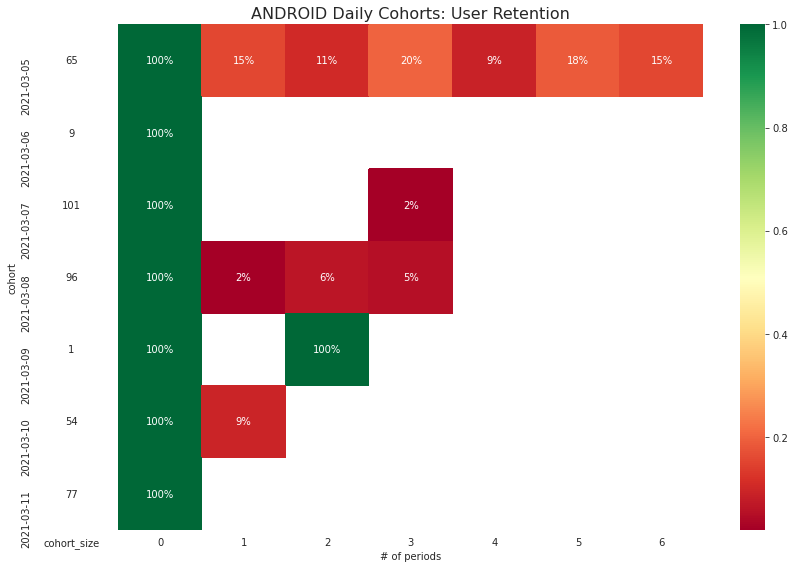

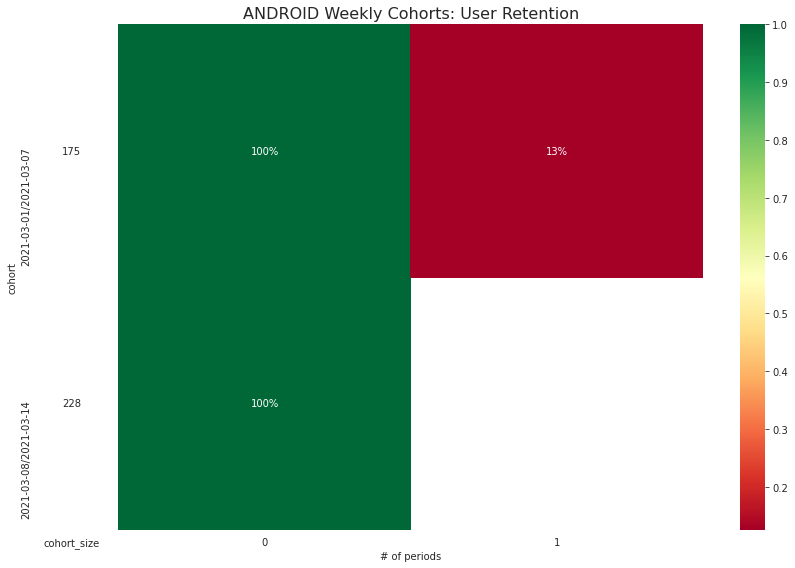

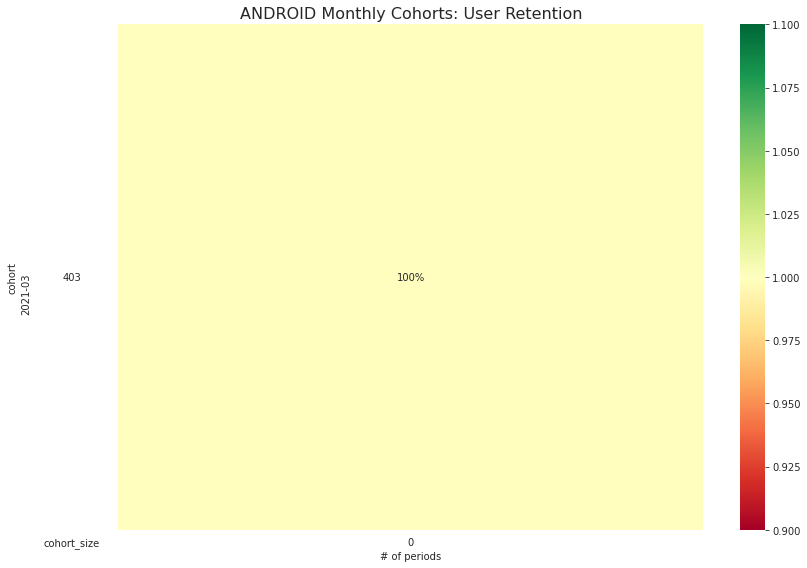

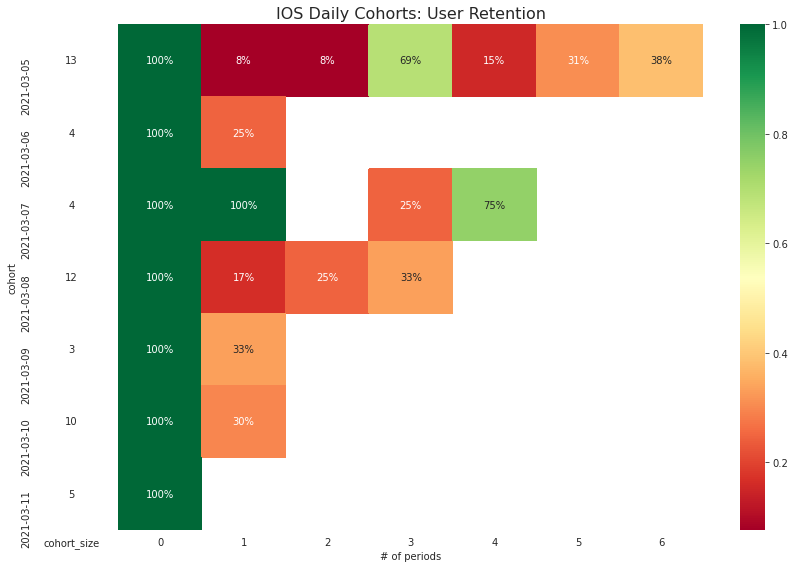

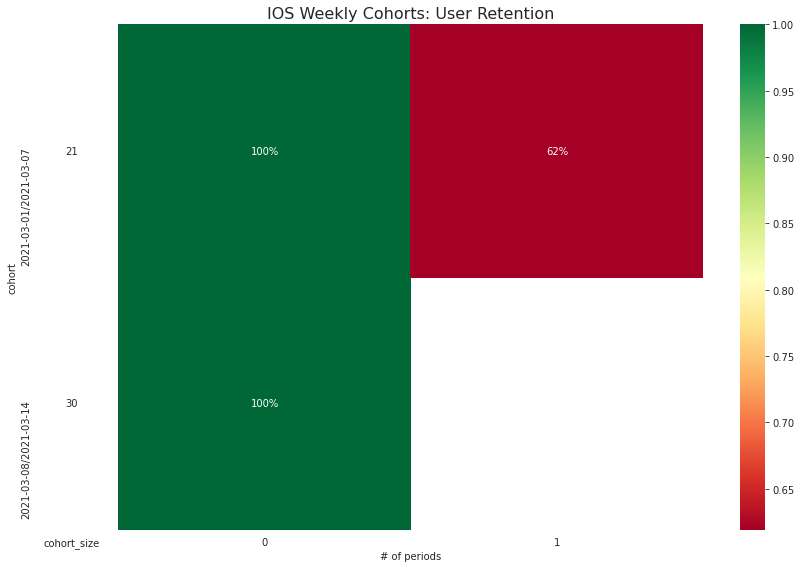

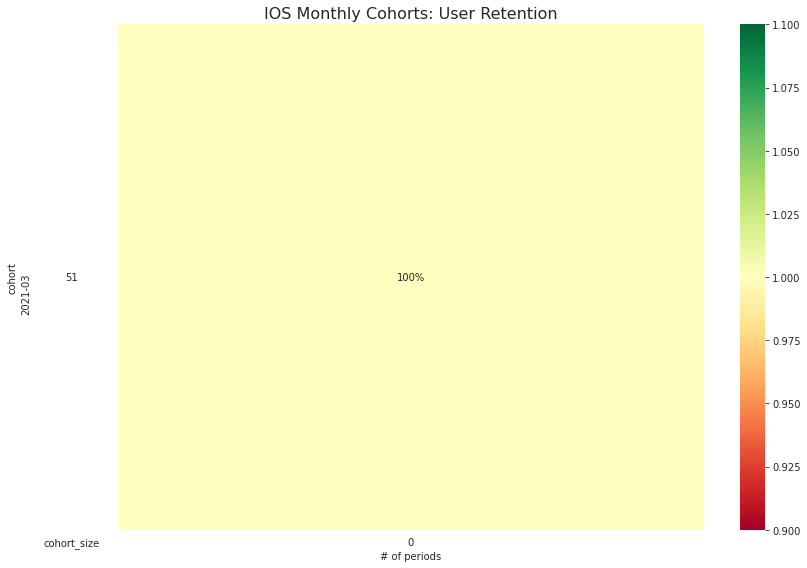

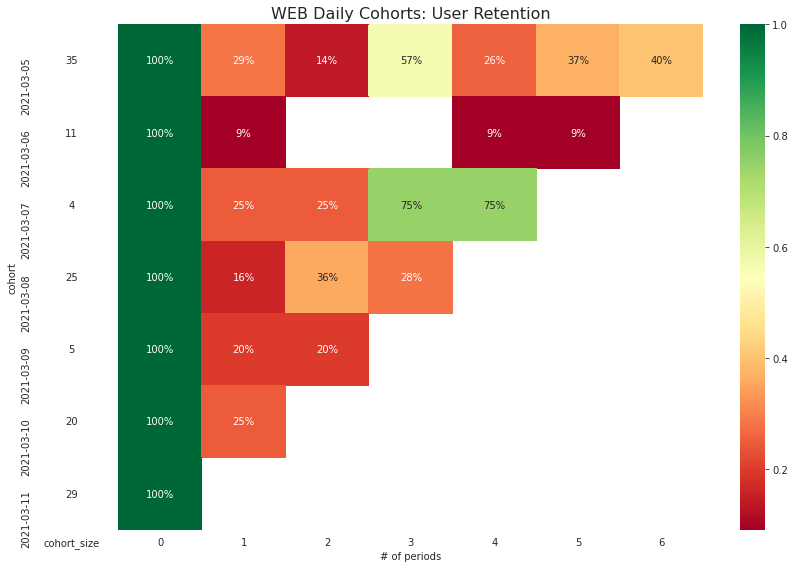

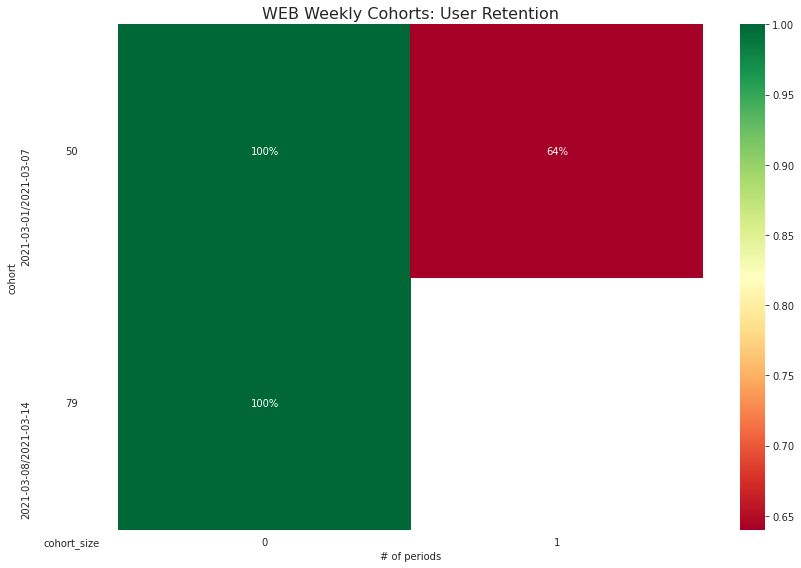

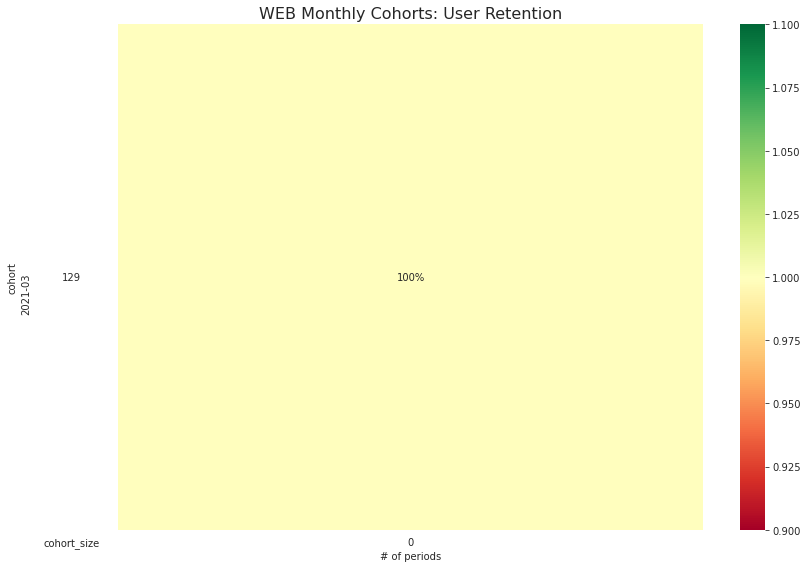

In [15]:
get_platformwise_retention(segment,time_window)

In [10]:
new_ext_users = set([58,5,658,1973,658,1509,658,625,698,32776,698,31153,698,18550,2896,1500000376,2904,1500000198,2904,1500000197,2904,1500000182,3132,34021,3132,31197,3132,31198,3234,1500000390,3234,1500000389,3234,1500000388,3234,1500000387,3487,34024,3489,1500000212,3489,1500000211,3489,33987,5009,18482,5010,1500001599,6472,1500000716,6482,15535,6482,15534,7966,1500000231,7972,32757,7975,1500021845,7975,1500000446,9455,1500004382,9455,1500003780,9472,1500005211,9472,1500000346,10901,1500014299,10901,1500000245,10909,35666,10909,35610,10909,35609,10909,35607,10936,1500005041,10937,1500000313,10937,1500000284,10937,1500000283,10937,1500000190,10939,1500000812,10940,1500001210,12413,35624,12420,1500002582,12420,1500002496,12420,1500002495,12420,37187,12498,1500007178,12498,1500001657,13381,13971,1500001684,13971,1500001459,13971,1500000627,13971,35631,14034,1500005625,14034,23503,15503,29651,15505,1500001718,15508,1500004694,15508,1500004693,15508,1500002494,15508,1500002493,15509,1500000411,15509,32730,15509,31150,15509,22212,15512,1500000572,15512,1500000554,15512,1500000552,15512,1500000543,15795,1500019956,15795,1500019955,15795,1500019949,15795,1500000601,17008,33973,18457,1500002197,18524,21604,18524,20043,18524,20042,18524,18525,18559,18561,18563,1500002003,20008,1500000244,20008,35619,20013,1500011981,20013,1500000174,20014,1500001607,20014,23548,20047,1500001183,20047,1500001182,20047,1500000820,20047,25157,20050,33976,20052,20115,20052,20053,20069,1500001739,20074,1500000383,20076,20082,20081,1500006776,20081,33929,20084,1500001044,20088,37457,20093,1500000181,20094,1500000194,20106,25029,20106,25028,20114,1500000743,21553,1500002433,21553,1500000720,21619,1500005891,21619,1500002492,21619,1500002230,21619,1500001264,21635,33975,21635,33905,21635,23265,21639,21640,21657,22216,21657,22208,21657,22207,21657,22143,21871,1500000707,21871,1500000706,23149,1500000370,23149,33986,23205,23207,23214,1500000412,23288,23292,23325,1500000444,23325,31202,23325,31201,23325,23326,23426,34020,23426,34009,23458,34033,23523,33940,23545,26694,23680,23894,23991,39169,25177,29638,25177,29633,25177,26680,25177,25178,25188,25189,25887,32626,29635,1500004140,29645,1500001468,29645,33981,29645,32737,29666,1500000311,29666,33977,29678,29681,29678,29680,29678,29679,31139,31193,31139,31194,31139,31140,31157,37477,31159,1500000405,31159,1500000185,31164,31178,31164,31177,31164,31176,31164,31165,31167,49671,31167,49670,31167,31168,31189,31190,31203,36044,33952,33953,33956,33959,33967,33969,33991,1500018897,33991,1500018896,33991,37301,35588,1500017906,35588,35589,35618,1500015676,35618,1500015674,35618,1500001849,35618,35620,35651,37577,35651,35653,35655,35660,37197,37199,37217,37220,37251,1500004967,37251,1500000465,37251,37310,37251,37254,37304,37305,37363,37364,37410,37411,37446,37447,37482,37483,37484,37485,43630,43631,52705,1500000555,72080,72082,72085,78393,72085,78392,72085,72086,72211,1500001152,72211,1500000973,72211,72246,72211,72245,1500000042,1500000043,1500000046,1500000047,1500000049,1500000050,1500000056,1500000057,1500000059,1500000060,1500000068,1500000070,1500000071,1500000072,1500000085,1500000072,1500000073,1500000074,1500000288,1500000080,1500000794,1500000080,1500000081,1500000082,1500000098,1500000099,1500000100,1500000101,1500000104,1500007206,1500000125,1500000126,1500000128,1500000130,1500000131,1500000132,1500000133,1500000134,1500000142,1500000134,1500000141,1500000134,1500000135,1500000136,1500000137,1500000138,1500000140,1500000138,1500000139,1500000146,1500000147,1500000150,1500000154,1500000150,1500000151,1500000157,1500000158,1500000159,1500000160,1500000161,1500000162,1500000164,1500000165,1500000175,1500000176,1500000177,1500000178,1500000179,1500000180,1500000186,1500000406,1500000186,1500000297,1500000186,1500000196,1500000186,1500000188,1500000187,1500000260,1500000187,1500000213,1500000187,1500000189,1500000192,1500000195,1500000192,1500000193,1500000214,1500000215,1500000216,1500000386,1500000216,1500000220,1500000216,1500000218,1500000216,1500000217,1500000221,1500000222,1500000227,1500000229,1500000227,1500000228,1500000230,1500000234,1500000287,1500000234,1500000286,1500000235,1500000236,1500000237,1500000238,1500000239,1500000259,1500000242,1500000243,1500000250,1500000252,1500000250,1500000251,1500000261,1500000262,1500000263,1500000269,1500000264,1500000265,1500000266,1500000270,1500000266,1500000268,1500000266,1500000267,1500000295,1500000310,1500000295,1500000296,1500000298,1500000432,1500000298,1500000431,1500000298,1500000422,1500000298,1500000300,1500000299,1500000302,1500000299,1500000301,1500000323,1500000324,1500000340,1500000364,1500000341,1500000342,1500000367,1500000372,1500000374,1500000391,1500000393,1500000394,1500000395,1500000404,1500000425,1500000427,1500000425,1500000426,1500000438,1500000439,1500000441,1500000796,1500000441,1500000784,1500000441,1500000682,1500000453,1500000454,1500000467,1500000813,1500000469,1500000471,1500000469,1500000470,1500000474,1500001604,1500000474,1500000476,1500000474,1500000475,1500000483,1500000503,1500000509,1500000513,1500000509,1500000512,1500000509,1500000511,1500000509,1500000510,1500000515,1500000516,1500000519,1500000523,1500000519,1500000522,1500000519,1500000521,1500000519,1500000520,1500000526,1500000559,1500000526,1500000558,1500000526,1500000528,1500000527,1500010269,1500000533,1500000534,1500000536,1500000541,1500000548,1500000550,1500000548,1500000549,1500000569,1500001625,1500000569,1500000571,1500000569,1500000570,1500000588,1500000589,1500000612,1500000615,1500000620,1500000624,1500000620,1500000623,1500000620,1500000622,1500000620,1500000621,1500000630,1500001031,1500000630,1500000631,1500000654,1500000656,1500000663,1500000667,1500000672,1500000674,1500000673,1500000675,1500000676,1500000677,1500000686,1500000687,1500000708,1500000709,1500000710,1500000711,1500000712,1500000713,1500000717,1500000719,1500000718,1500000736,1500000739,1500000736,1500000738,1500000736,1500000737,1500000751,1500000752,1500000760,1500000761,1500000763,1500000764,1500000769,1500000783,1500000769,1500000770,1500000785,1500000786,1500000787,1500000788,1500000789,1500000790,1500000804,1500000805,1500000806,1500000807,1500000822,1500000823,1500000826,1500000827,1500000994,1500000995,1500001008,1500001009,1500001014,1500001019,1500001014,1500001015,1500001032,1500001033,1500001037,1500001038,1500001055,1500001056,1500001057,1500001058,1500001061,1500001070,1500001102,1500001104,1500001144,1500001147,1500001145,1500001146,1500001148,1500001248,1500001148,1500001153,1500001148,1500001151,1500001150,1500001186,1500001188,1500001186,1500001187,1500001250,1500001254,1500001252,1500001253,1500001255,1500001256,1500001265,1500001266,1500001273,1500001274,1500001277,1500001279,1500001278,1500010055,1500001300,1500001301,1500001392,1500001393,1500001413,1500001414,1500001438,1500001729,1500001438,1500001628,1500001438,1500001612,1500001438,1500001439,1500001470,1500001471,1500001518,1500001519,1500001531,1500001533,1500001540,1500001541,1500001547,1500001548,1500001553,1500001555,1500001553,1500001554,1500001594,1500001595,1500001605,1500001606,1500001609,1500001610,1500001620,1500001629,1500001630,1500001666,1500001668,1500001672,1500001674,1500001672,1500001673,1500001690,1500001691,1500001693,1500021941,1500001693,1500021940,1500001693,1500021939,1500001693,1500001694,1500001723,1500001724,1500001751,1500001752,1500001847,1500001848,1500001908,1500001909,1500001916,1500001933,1500001916,1500001917,1500001918,1500002131,1500001918,1500001919,1500001925,1500002073,1500002074,1500002134,1500002135,1500002144,1500005218,1500002144,1500002145,1500002148,1500002149,1500002150,1500002151,1500002152,1500002153,1500002156,1500005554,1500002156,1500002157,1500002164,1500002169,1500002164,1500002165,1500002172,1500002284,1500002172,1500002178,1500002172,1500002173,1500002175,1500002177,1500002175,1500002176,1500002193,1500002194,1500002195,1500002196,1500002199,1500002200,1500002214,1500002215,1500002320,1500002321,1500002484,1500002487,1500002484,1500002486,1500002484,1500002485,1500002490,1500002491,1500002499,1500002500,1500002542,1500002543,1500002568,1500002569,1500002625,1500002633,1500002625,1500002628,1500002679,1500002681,1500002715,1500002717,1500002715,1500002716,1500002799,1500002800,1500002811,1500002815,1500002822,1500002824,1500002823,1500002870,1500002871,1500002917,1500002918,1500002987,1500002988,1500003204,1500004951,1500003204,1500003205,1500003208,1500003407,1500003208,1500003211,1500003208,1500003209,1500003222,1500003223,1500003268,1500003269,1500003270,1500003271,1500003281,1500003282,1500003363,1500003960,1500003363,1500003365,1500003364,1500003425,1500003364,1500003424,1500003364,1500003373,1500003364,1500003369,1500003367,1500003370,1500003422,1500003423,1500003427,1500003428,1500003498,1500004698,1500003520,1500003521,1500003522,1500003523,1500003526,1500011630,1500003526,1500011629,1500003526,1500011628,1500003529,1500003530,1500003532,1500003533,1500003534,1500003535,1500003561,1500003563,1500003561,1500003562,1500003771,1500003772,1500003774,1500003775,1500003783,1500003784,1500003835,1500003836,1500003843,1500003844,1500003846,1500003847,1500003892,1500003893,1500003984,1500003985,1500004008,1500004009,1500004039,1500004040,1500004218,1500004219,1500004223,1500004226,1500004224,1500004227,1500004225,1500004228,1500004235,1500004236,1500004320,1500004507,1500004508,1500004691,1500004692,1500004697,1500004699,1500004701,1500004702,1500004703,1500004704,1500004707,1500004719,1500004749,1500004719,1500004720,1500004734,1500004736,1500004761,1500004765,1500004966,1500004765,1500004768,1500004944,1500004945,1500004947,1500004948,1500004955,1500004956,1500004957,1500004958,1500004959,1500004960,1500004969,1500004977,1500004969,1500004971,1500004969,1500004970,1500004972,1500004973,1500004975,1500004976,1500004978,1500004979,1500004980,1500004981,1500004984,1500004985,1500004987,1500004988,1500004990,1500004991,1500004992,1500005210,1500004992,1500005034,1500004992,1500004993,1500004995,1500004996,1500004998,1500005001,1500005054,1500005055,1500005056,1500005063,1500005056,1500005061,1500005075,39174,1500005075,39173,1500005078,1500005079,1500005088,1500005092,1500005088,1500005090,1500005113,1500005117,1500005113,1500005116,1500005113,1500005115,1500005113,1500005114,1500005146,1500005256,1500005146,1500005255,1500005146,1500005151,1500005149,1500005223,1500005149,1500005150,1500005184,1500005186,1500005208,37398,1500005208,37397,1500005209,1500005213,1500005212,39646,1500005212,21620,1500005214,1500005215,1500005216,1500005217,1500005220,1500005221,1500005243,1500005244,1500005246,1500005247,1500005248,1500005249,1500005252,18509,1500005252,31173,1500005252,31207,1500005252,15514,1500005254,3505,1500005286,1500005568,1500005286,1500005296,1500005286,1500005295,1500005286,1500005287,1500005293,2997,1500005293,2996,1500005317,3480,1500005318,3481,1500005320,3488,1500005322,17009,1500005322,5005,1500005323,5015,1500005324,6466,1500005325,6476,1500005325,6474,1500005326,6475,1500005327,6478,1500005330,7947,1500005330,7946,1500005330,7945,1500005330,7943,1500005332,7958,1500005333,7960,1500005336,7965,1500005337,7968,1500005338,7970,1500005339,7973,1500005340,7974,1500005341,18539,1500005341,7976,1500005342,7977,1500005343,7982,1500005344,7984,1500005345,7986,1500005346,9417,1500005347,9447,1500005348,9450,1500005349,9454,1500005349,9452,1500005350,9456,1500005351,9457,1500005352,1500018930,1500005352,1500018922,1500005352,9460,1500005354,9463,1500005355,9464,1500005356,9465,1500005357,9469,1500005357,9466,1500005358,9468,1500005358,9467,1500005359,9470,1500005360,9474,1500005360,9473,1500005361,10952,1500005361,10900,1500005361,10899,1500005362,12501,1500005362,10951,1500005362,10950,1500005363,12484,1500005363,12483,1500005363,10954,1500005363,10953,1500005364,12381,1500005364,12380,1500005364,12379,1500005364,10955,1500005365,12391,1500005366,12497,1500005366,31144,1500005366,23266,1500005366,12416,1500005367,26693,1500005367,12417,1500005371,14044,1500005371,20045,1500005371,13872,1500005372,14036,1500005373,14037,1500005375,15515,1500005375,14039,1500005376,15484,1500005376,14045,1500005377,15420,1500005378,18547,1500005378,18546,1500005378,18545,1500005378,15510,1500005380,25107,1500005380,23176,1500005380,23174,1500005380,15519,1500005382,15524,1500005383,15526,1500005384,18510,1500005384,15527,1500005387,16985,1500005389,18466,1500005389,18427,1500005389,18228,1500005390,18455,1500005390,18454,1500005390,18453,1500005390,18448,1500005393,18458,1500005396,18516,1500005396,18514,1500005397,18515,1500005398,29674,1500005398,25170,1500005398,26685,1500005398,18517,1500005402,25065,1500005402,18531,1500005402,18530,1500005404,26704,1500005404,20111,1500005404,20105,1500005404,18533,1500005406,20960,1500005406,20876,1500005406,20843,1500005406,18551,1500005407,49687,1500005407,42165,1500005407,38660,1500005407,18562,1500005408,18879,1500005408,18565,1500005408,18564,1500005410,20054,1500005411,20100,1500005412,21609,1500005414,32682,1500005415,32710,1500005417,34012,1500005423,40689,1500005433,1500005434,1500005435,1500005436,1500005467,1500006990,1500005467,1500006989,1500005467,1500005556,1500005467,1500005555,1500005552,1500005553,1500005616,1500006021,1500005616,1500006020,1500005616,1500006019,1500005616,1500006018,1500005621,1500005622,1500005626,1500005627,1500005631,1500005632,1500005754,1500005833,1500005834,1500005837,1500005844,1500005837,1500005838,1500005864,1500005866,1500005864,1500005865,1500005875,1500005876,1500005879,1500005880,1500005881,1500005882,1500005883,1500005884,1500005886,1500005887,1500005889,1500005926,1500005889,1500005890,1500005897,1500005900,1500005897,1500005899,1500005897,1500005898,1500005905,1500005906,1500005907,1500005908,1500005911,1500005912,1500005913,1500005914,1500005918,1500005919,1500005921,1500005922,1500005923,1500005929,1500007123,1500005929,1500005930,1500005936,1500005937,1500005941,23531,1500005941,21626,1500005962,1500005963,1500005969,33920,1500005969,33919,1500005972,1500005973,1500005977,1500005978,1500005981,1500005982,1500005989,1500005990,1500005991,1500005994,1500005996,1500005994,1500005995,1500006000,1500006002,1500006001,1500006004,1500006005,1500006007,1500006005,1500006006,1500006008,1500006009,1500006015,1500006016,1500006022,1500006100,1500006022,1500006023,1500006024,1500006025,1500006031,25118,1500006031,20091,1500006033,1500006034,1500006043,1500006044,1500006051,1500006052,1500006054,1500006055,1500006056,1500006081,1500006056,1500006057,1500006059,1500006065,1500006060,1500006061,1500006063,1500006064,1500006071,1500006074,1500006071,1500006073,1500006071,1500006072,1500006075,1500006076,1500006079,1500006080,1500006083,1500006085,1500006086,1500006087,1500006088,1500006090,1500006091,1500006094,1500007053,1500006097,1500006098,1500006101,1500006104,1500006105,1500006106,1500006107,1500006112,237,1500006112,230,1500006113,32,1500006113,31,1500006114,28,1500006114,27,1500006117,92,1500006117,87,1500006118,29641,1500006118,29640,1500006119,287,1500006119,286,1500006120,289,1500006120,288,1500006121,319,1500006121,1534,1500006121,330,1500006122,1481,1500006122,1482,1500006122,357,1500006123,220,1500006123,472,1500006162,1535,1500006162,834,1500006164,2034,1500006164,1095,1500006169,683,1500006169,1133,1500006170,2300,1500006170,1532,1500006170,474,1500006170,1154,1500006171,1602,1500006171,1223,1500006181,20095,1500006184,3082,1500006185,3083,1500006188,20021,1500006190,3125,1500006191,3129,1500006192,42138,1500006192,29650,1500006192,29649,1500006194,3131,1500006195,20022,1500006195,20018,1500006196,3122,1500006200,2876,1500006201,2877,1500006202,2878,1500006203,2879,1500006204,2880,1500006205,2881,1500006206,2888,1500006206,2887,1500006208,2899,1500006208,2898,1500006209,10941,1500006209,2909,1500006210,2940,1500006210,2939,1500006211,2942,1500006211,2941,1500006213,2951,1500006213,2952,1500006213,2953,1500006213,2954,1500006213,2950,1500006215,2960,1500006222,3007,1500006223,3008,1500006224,3009,1500006226,3011,1500006228,3013,1500006229,3014,1500006230,3015,1500006236,3024,1500006237,3025,1500006238,3026,1500006239,3028,1500006240,3029,1500006241,3030,1500006243,29655,1500006244,3164,1500006244,3165,1500006244,3168,1500006244,3163,1500006245,20098,1500006245,20097,1500006248,42862,1500006248,35659,1500006248,29658,1500006249,3456,1500006249,3320,1500006250,37432,1500006250,33904,1500006250,29659,1500006251,29661,1500006252,20035,1500006252,20036,1500006252,20034,1500006253,29675,1500006253,29676,1500006253,29677,1500006253,20099,1500006254,20104,1500006255,20040,1500006255,20039,1500006256,29663,1500006257,20049,1500006258,20020,1500006258,20019,1500006259,1127,1500006260,20048,1500006263,20063,1500006264,25194,1500006264,25193,1500006264,25192,1500006264,1970,1500006264,1103,1500006265,29668,1500006265,29667,1500006266,21574,1500006266,21572,1500006266,21571,1500006266,20112,1500006268,29673,1500006268,29672,1500006268,29671,1500006268,29670,1500006271,58780,1500006271,58770,1500006271,23505,1500006271,20080,1500006274,20011,1500006274,20010,1500006275,29683,1500006275,29682,1500006276,21555,1500006277,21556,1500006278,21615,1500006280,21605,1500006281,21606,1500006282,21621,1500006283,21622,1500006284,21623,1500006286,51214,1500006286,51213,1500006286,21629,1500006288,46586,1500006288,21637,1500006289,21642,1500006290,21641,1500006291,21643,1500006292,21644,1500006294,21646,1500006294,21645,1500006295,23167,1500006295,21649,1500006298,23582,1500006298,23581,1500006298,23580,1500006298,21647,1500006299,21616,1500006300,21666,1500006301,21667,1500006303,21671,1500006303,21670,1500006304,33955,1500006304,21665,1500006305,37168,1500006305,21668,1500006306,23442,1500006306,23439,1500006306,23437,1500006306,21662,1500006308,137796,1500006308,23164,1500006308,23162,1500006309,23166,1500006309,23165,1500006311,225990,1500006311,23314,1500006311,23171,1500006311,23169,1500006313,23177,1500006313,23175,1500006315,23188,1500006315,23186,1500006315,23185,1500006315,23184,1500006316,23191,1500006316,23187,1500006317,25187,1500006317,23193,1500006317,23189,1500006319,23196,1500006319,23194,1500006319,23192,1500006320,23198,1500006320,23197,1500006321,23202,1500006321,23201,1500006322,25038,1500006322,25037,1500006322,23210,1500006322,23206,1500006323,23209,1500006323,23208,1500006330,23569,1500006330,23226,1500006332,23230,1500006332,23229,1500006339,23246,1500006339,23245,1500006340,23248,1500006340,23247,1500006342,23255,1500006342,23254,1500006344,23215,1500006345,23262,1500006345,23261,1500006347,23309,1500006347,23308,1500006347,23269,1500006347,23267,1500006348,23271,1500006348,23182,1500006348,23180,1500006350,23273,1500006350,23272,1500006351,23277,1500006351,23275,1500006354,23283,1500006354,23282,1500006355,23293,1500006355,23284,1500006358,23327,1500006358,23299,1500006358,23296,1500006361,23302,1500006364,23307,1500006364,23306,1500006365,25056,1500006365,25055,1500006365,23312,1500006365,23310,1500006366,23313,1500006366,23311,1500006367,23328,1500006367,23316,1500006367,23315,1500006369,23319,1500006377,25104,1500006377,23295,1500006377,23290,1500006378,25190,1500006378,23342,1500006378,23340,1500006382,23349,1500006383,23351,1500006383,23350,1500006385,23355,1500006385,23354,1500006386,23363,1500006386,23356,1500006389,23391,1500006389,23370,1500006389,23361,1500006389,23359,1500006391,23364,1500006393,23372,1500006393,23371,1500006395,23376,1500006395,23374,1500006396,23380,1500006396,23379,1500006399,23476,1500006399,23388,1500006400,23394,1500006400,23393,1500006407,23429,1500006407,23428,1500006408,23430,1500006409,23454,1500006409,23446,1500006409,23431,1500006409,23385,1500006409,23384,1500006412,23433,1500006412,23432,1500006417,20075,1500006418,23453,1500006419,23456,1500006419,23455,1500006422,23547,1500006422,23501,1500006422,23466,1500006423,23469,1500006423,23467,1500006424,23468,1500006426,23473,1500006426,23472,1500006430,23478,1500006430,23477,1500006432,1500019540,1500006432,23480,1500006434,23485,1500006434,23484,1500006435,23488,1500006435,23486,1500006437,23493,1500006437,23492,1500006438,23495,1500006438,23494,1500006439,23530,1500006439,23508,1500006439,23336,1500006440,23496,1500006442,23500,1500006442,23499,1500006443,23507,1500006443,23506,1500006444,31163,1500006444,31162,1500006444,23510,1500006444,23509,1500006445,23512,1500006445,23511,1500006446,23514,1500006446,23513,1500006447,23517,1500006448,23577,1500006448,23576,1500006448,23522,1500006448,23521,1500006449,25139,1500006449,25137,1500006449,23526,1500006449,23524,1500006450,23528,1500006450,23527,1500006451,23535,1500006451,23534,1500006451,23533,1500006451,23532,1500006452,23276,1500006452,23274,1500006452,23250,1500006452,23249,1500006457,23556,1500006457,23555,1500006458,23552,1500006458,23551,1500006458,23549,1500006459,23543,1500006459,23541,1500006460,85015,1500006460,85014,1500006460,23559,1500006460,23558,1500006460,23557,1500006461,23564,1500006461,23563,1500006462,23565,1500006463,23529,1500006464,23572,1500006464,23570,1500006465,23571,1500006466,23574,1500006466,23573,1500006467,23579,1500006467,23578,1500006470,23850,1500006470,23826,1500006470,23809,1500006470,23786,1500006472,25031,1500006472,25030,1500006475,25048,1500006475,25047,1500006479,25058,1500006481,25072,1500006481,25071,1500006482,25075,1500006482,25074,1500006482,25073,1500006485,25081,1500006485,25080,1500006486,25083,1500006486,25082,1500006487,25084,1500006490,25093,1500006490,25091,1500006491,25092,1500006492,25097,1500006492,24080,1500006492,24075,1500006498,25117,1500006501,25138,1500006501,25136,1500006502,25140,1500006504,23502,1500006504,23367,1500006504,23365,1500006506,25147,1500006506,25146,1500006507,25148,1500006509,25154,1500006509,25153,1500006510,25156,1500006510,25155,1500006511,25159,1500006511,25158,1500006512,25163,1500006512,25161,1500006512,25160,1500006514,25167,1500006514,25166,1500006517,25179,1500006519,25191,1500006521,25494,1500006521,25423,1500006522,25612,1500006523,26634,1500006523,26633,1500006524,251583,1500006524,26641,1500006524,26640,1500006525,28137,1500006525,26653,1500006525,26637,1500006525,26635,1500006526,26644,1500006526,26643,1500006527,26678,1500006527,26676,1500006528,26679,1500006528,26677,1500006529,26681,1500006530,26683,1500006530,26682,1500006531,26690,1500006531,26689,1500006532,26692,1500006532,26691,1500006534,28172,1500006534,26701,1500006534,26700,1500006535,26703,1500006535,26702,1500006536,26705,1500006537,25173,1500006537,25162,1500006538,26706,1500006539,27987,1500006539,27978,1500006540,28168,1500006540,28167,1500006541,28174,1500006541,28173,1500006542,29630,1500006542,29629,1500006543,29632,1500006543,29631,1500006544,29637,1500006544,29636,1500006545,31143,1500006545,31142,1500006548,31154,1500006549,31188,1500006549,31187,1500006549,31186,1500006549,31185,1500006549,31184,1500006550,31192,1500006550,31191,1500006551,31172,1500006551,31171,1500006551,30056,1500006551,30052,1500006552,37108,1500006552,31200,1500006552,31199,1500006553,23285,1500006553,3135,1500006554,33988,1500006554,20064,1500006554,3145,1500006555,21638,1500006555,20077,1500006556,28136,1500006556,28135,1500006559,32662,1500006559,32661,1500006559,32660,1500006560,32675,1500006560,32663,1500006561,32668,1500006561,32667,1500006561,32666,1500006562,32671,1500006562,32670,1500006562,32669,1500006564,32677,1500006564,32676,1500006566,32687,1500006566,32686,1500006568,32764,1500006568,32762,1500006568,32681,1500006569,33958,1500006569,33957,1500006569,23232,1500006569,23231,1500006570,32732,1500006570,32731,1500006571,32736,1500006571,32735,1500006572,32740,1500006572,32739,1500006572,32738,1500006573,32742,1500006573,32741,1500006574,32743,1500006576,32749,1500006576,32748,1500006577,32751,1500006577,32750,1500006578,32753,1500006578,32752,1500006579,33899,1500006579,33898,1500006581,33918,1500006581,33917,1500006582,23204,1500006582,23203,1500006583,33914,1500006584,33945,1500006584,33943,1500006585,33965,1500006586,33970,1500006587,33971,1500006588,33983,1500006589,33985,1500006589,33984,1500006591,45157,1500006591,42204,1500006591,33994,1500006591,33993,1500006593,35572,1500006593,35571,1500006594,35627,1500006594,35626,1500006597,35654,1500006597,35652,1500006598,35657,1500006598,35658,1500006598,35656,1500006599,35664,1500006599,35663,1500006600,36255,1500006600,36240,1500006601,36359,1500006601,36352,1500006603,37162,1500006603,37161,1500006604,37165,1500006604,37164,1500006606,37173,1500006606,37172,1500006608,37235,1500006608,37234,1500006609,37243,1500006609,37242,1500006609,37241,1500006610,37245,1500006610,37244,1500006611,37287,1500006612,37288,1500006613,37296,1500006613,37295,1500006614,37298,1500006614,37297,1500006615,37300,1500006615,37299,1500006616,23268,1500006617,37359,1500006617,37358,1500006618,37414,1500006618,37413,1500006618,37412,1500006619,37416,1500006619,37415,1500006620,37417,1500006621,37420,1500006621,37419,1500006622,37422,1500006622,37421,1500006623,37426,1500006623,37425,1500006624,37429,1500006624,37428,1500006625,37435,1500006625,37434,1500006626,37439,1500006626,37438,1500006627,136626,1500006627,39118,1500006627,39117,1500006629,39145,1500006632,39184,1500006632,39183,1500006633,39190,1500006634,40626,1500006634,40625,1500006635,40673,1500006635,40672,1500006636,26542,1500006636,26533,1500006637,40692,1500006637,40691,1500006638,42113,1500006639,43462,1500006639,43450,1500006641,43643,1500006641,43642,1500006642,43646,1500006642,43645,1500006644,43649,1500006645,175512,1500006645,43655,1500006645,43654,1500006646,43659,1500006646,43658,1500006648,43671,1500006648,43670,1500006649,43673,1500006649,43672,1500006650,43677,1500006650,43676,1500006651,43679,1500006651,43678,1500006652,43697,1500006652,43684,1500006653,44414,1500006654,45095,1500006655,46589,1500006655,46588,1500006656,46592,1500006656,46591,1500006657,46594,1500006657,46593,1500006658,46595,1500006658,46590,1500006659,46648,1500006659,46647,1500006659,46597,1500006659,46596,1500006660,43663,1500006660,43657,1500006660,43656,1500006661,46659,1500006661,46658,1500006662,46661,1500006662,46660,1500006663,48133,1500006663,48086,1500006664,48090,1500006664,48089,1500006664,48088,1500006664,48087,1500006665,119680,1500006665,119673,1500006665,48142,1500006665,48141,1500006666,43636,1500006666,43638,1500006666,43637,1500006666,43635,1500006667,48145,1500006667,48144,1500006668,48147,1500006668,48146,1500006669,48159,1500006669,45153,1500006670,48173,1500006670,48172,1500006673,43812,1500006675,51200,1500006675,51199,1500006676,51225,1500006676,51224,1500006678,52723,1500006678,52722,1500006679,52744,1500006679,52743,1500006681,55734,1500006681,55733,1500006682,55739,1500006682,55738,1500006682,55737,1500006683,55744,1500006683,55743,1500006684,58746,1500006684,58745,1500006685,59922,1500006685,59898,1500006685,58748,1500006685,58747,1500006686,23445,1500006686,23443,1500006686,23441,1500006687,72067,1500006687,72066,1500006689,78395,1500006689,78394,1500006690,85018,1500006690,85017,1500006690,85016,1500006691,98215,1500006692,100433,1500006692,100427,1500006692,100092,1500006692,100086,1500006693,100413,1500006693,100409,1500006693,100391,1500006693,100373,1500006693,100369,1500006694,105535,1500006694,100454,1500006696,130114,1500006696,130113,1500006697,132441,1500006697,130118,1500006697,130117,1500006697,130116,1500006698,136625,1500006698,136624,1500006699,136628,1500006699,136627,1500006700,155975,1500006700,155970,1500006700,155852,1500006701,155974,1500006701,155973,1500006701,155864,1500006701,155859,1500006701,155855,1500006702,155980,1500006702,155881,1500006702,155870,1500006703,155895,1500006703,155890,1500006704,155968,1500006705,162654,1500006705,162653,1500006706,220504,1500006710,40677,1500006710,40676,1500006711,40629,1500006711,40628,1500006712,39188,1500006712,39186,1500006713,39187,1500006713,39185,1500006714,37451,1500006714,37450,1500006715,37455,1500006715,37454,1500006716,37461,1500006716,37459,1500006717,37463,1500006717,37462,1500006718,37466,1500006718,37464,1500006719,37473,1500006719,37472,1500006720,37362,1500006720,37361,1500006721,37406,1500006721,37405,1500006722,37330,1500006722,37327,1500006723,37354,1500006723,37353,1500006724,37227,1500006724,37224,1500006725,37188,1500006725,37186,1500006726,37177,1500006726,37176,1500006727,37180,1500006727,37179,1500006728,37193,1500006728,37183,1500006728,37181,1500006729,37154,1500006729,37153,1500006730,35650,1500006730,35649,1500006731,35647,1500006731,35645,1500006732,35603,1500006732,35601,1500006733,35593,1500006733,35592,1500006734,251540,1500006734,244617,1500006734,35585,1500006734,33950,1500006734,33947,1500006735,35574,1500006735,35573,1500006736,35564,1500006736,35563,1500006737,35554,1500006738,39157,1500006738,39156,1500006739,37194,1500006739,34067,1500006740,34063,1500006741,34053,1500006741,34052,1500006742,35665,1500006742,34016,1500006743,34014,1500006743,34013,1500006744,33980,1500006744,33979,1500006745,33961,1500006745,33960,1500006746,42112,1500006746,33962,1500006746,33954,1500006747,33951,1500006747,33948,1500006748,33949,1500006748,33946,1500006749,33944,1500006749,33942,1500006750,33941,1500006751,33937,1500006751,33934,1500006753,33932,1500006753,33930,1500006754,33936,1500006754,33928,1500006755,33927,1500006755,33925,1500006756,32678,1500006757,28170,1500006757,28169,1500006759,25096,1500006759,25094,1500006760,25070,1500006760,25069,1500006761,23122,1500006761,18021,1500006761,29648,1500006761,18014,1500006762,23491,1500006762,23490,1500006763,23145,1500006763,23144,1500006764,33913,1500006764,20110,1500006764,20057,1500006764,20056,1500006765,21611,1500006765,21610,1500006766,21597,1500006766,21596,1500006767,18528,1500006767,18527,1500006768,18522,1500006768,18521,1500006769,18557,1500006769,18556,1500006769,18555,1500006769,18469,1500006769,18468,1500006770,20071,1500006770,20070,1500006771,29660,1500006774,1500006775,1500006781,1500006782,1500006783,1500006786,1500006787,1500006948,1500006949,1500006954,1500006955,1500006956,1500006957,1500006969,1500006970,1500006981,1500006982,1500006985,1500006986,1500006993,1500006994,1500006995,1500006996,1500006997,1500007001,1500006997,1500007000,1500006997,1500006999,1500006997,1500006998,1500007002,1500007003,1500007004,1500007005,1500007006,1500007007,1500007009,1500007010,1500007011,1500007012,1500007015,1500007016,1500007022,1500007024,1500007022,1500007023,1500007025,1500007026,1500007027,1500007028,1500007029,1500007030,1500007043,1500007044,1500007056,1500007057,1500007060,1500007061,1500007062,1500007063,1500007066,1500007067,1500007068,1500007069,1500007095,1500007096,1500007097,1500007109,1500007110,1500007111,1500007116,1500007111,1500007113,1500007111,1500007112,1500007114,1500007115,1500007141,1500007142,1500007151,1500007152,1500007167,1500007168,1500007169,1500007170,1500007180,1500007181,1500007184,1500007185,1500007191,1500007192,1500007207,1500007208,1500007216,1500007217,1500007219,1500007221,1500007219,1500007220,1500008995,1500008996,1500009423,1500009982,1500010011,1500009982,1500010009,1500009982,1500010007,1500009982,1500010005,1500010077,1500010209,1500010426,1500010209,1500010369,1500010209,1500010211,1500011497,1500011498,1500011532,1500011533,1500011542,1500011543,1500011558,1500011559,1500011562,1500011566,1500011562,1500011565,1500011720,1500011721,1500011797,1500011798,1500012278,1500012279,1500012289,1500012571,1500012289,1500012290,1500012291,1500012292,1500012307,1500012316,1500012307,1500012315,1500012375,1500012380,1500012375,1500012379,1500012400,1500012401,1500012420,1500012426,1500012537,1500012426,1500012536,1500012426,1500012430,1500012426,1500012429,1500012604,1500012608,1500012807,1500012808,1500012816,1500012817,1500013383,1500013386,1500014091,1500014094,1500014091,1500014093,1500014300,1500014305,1500014306,1500014307,1500014308,1500014310,1500014311,1500014312,1500014313,1500014314,1500014315,1500014316,1500014317,1500014318,1500014319,1500014320,1500014321,1500014322,1500014323,1500014324,1500014325,1500014326,1500014327,1500014328,1500014329,1500014330,1500014331,1500014332,1500014333,1500014334,1500014335,1500015108,1500015109,1500015118,1500015119,1500015135,1500015136,1500015159,1500015160,1500015161,1500015427,1500015428,1500015557,1500015563,1500015557,1500015562,1500015572,1500015610,1500015572,1500015591,1500015660,1500015685,1500016311,1500016312,1500016320,1500016439,1500016320,1500016437,1500016320,1500016321,1500016332,1500016333,1500016661,1500019780,1500016661,1500016784,1500017244,1500017245,1500017611,1500018259,1500017611,1500017617,1500017611,1500017616,1500017611,1500017615,1500017838,1500017845,1500017838,1500017844,1500018789,1500018929,1500018789,1500018790,1500018818,1500019020,1500018818,1500018823,1500018818,251649,1500018840,1500018841,1500018915,1500018917,1500018916,1500018950,1500018951,1500019007,1500019008,1500019018,1500019019,1500019022,1500019023,1500019054,1500019055,1500019072,1500019073,1500019215,1500019223,1500019306,1500019307,1500019320,1500019326,1500019320,1500019325,1500019320,1500019324,1500019320,1500019321,1500019322,1500019323,1500019337,1500019340,1500019341,1500019535,1500019665,1500019535,1500019536,1500019539,1500019544,1500019539,1500019543,1500019539,1500019542,1500019539,1500019541,1500019598,1500019599,1500019601,1500019602,1500019603,1500019604,1500019605,1500019606,1500019608,1500019609,1500019702,1500019703,1500019704,1500019705,1500019706,1500019709,480,1500019710,1500019773,1500019774,1500019776,1500019781,1500019782,1500019935,1500019936,1500019937,1500019938,1500019953,1500019954,1500019960,1500019961,1500019998,1500020000,1500020152,1500020153,1500020154,1500020156,1500020154,1500020155,1500020308,1500020310,1500020311,1500020314,1500020316,1500020317,1500020325,1500020328,1500020329,1500020363,1500020364,1500020365,1500020366,1500020369,1500020373,1500020369,1500020370,1500020398,1500020399,1500020603,1500020604,1500020873,1500020956,1500020957,1500020962,1500020963,1500020990,1500020993,1500020996,1500020997,1500021001,1500021002,1500021010,1500021011,1500021036,1500021037,1500021118,1500021119,1500021140,1500021141,1500021160,1500021161,1500021188,1500021189,1500021193,1500021197,1500021193,1500021194,1500021195,1500021198,1500021195,1500021196,1500021200,1500021201,1500021204,1500021205,1500021353,1500021354,1500021379,1500021380,1500021382,1500021383,1500021384,1500021385,1500021386,1500021387,1500021388,1500021389,1500021390,1500021391,1500021392,1500021393,1500021394,1500021395,1500021396,1500021397,1500021412,1500021398,1500021399,1500021400,1500021401,1500021402,1500021403,1500021404,1500021405,1500021406,1500021408,1500021413,1500021414,1500021415,1500021417,1500021418,1500021419,1500021420,1500021421,1500021425,1500021873,1500021425,1500021872,1500021425,1500021871,1500021425,1500021427,1500021432,1500021433,1500021435,1500021436,1500021437,1500021439,1500021440,1500021441,1500021442,1500021443,1500021444,1500021445,1500021446,1500021447,1500021448,1500021449,1500021451,1500021452,1500021453,1500021454,1500021455,1500021456,1500021457,1500021458,1500021459,1500021460,1500021461,1500021462,1500021463,1500021466,1500021467,1500021468,1500021469,1500021470,1500021471,1500021472,1500021473,1500021474,1500021475,1500021476,1500021477,1500021478,1500021479,1500021480,1500021481,1500021482,1500021483,1500021484,1500021485,1500021486,1500021487,1500021488,1500021489,1500021490,1500021491,1500021492,1500021493,1500021494,1500021495,1500021496,1500021497,1500021498,1500021499,1500021500,1500021501,1500021502,1500021503,1500021504,1500021505,1500021506,1500021507,1500021514,1500021515,1500021519,1500021520,1500021521,1500021522,1500021523,1500021524,1500021525,1500021526,1500021527,1500021528,1500021529,1500021530,1500021533,1500021534,1500021538,1500021539,1500021546,1500021547,1500021556,1500021557,1500021558,1500021559,1500021560,1500021561,1500021562,1500021563,1500021564,1500021565,1500021566,1500021567,1500021568,1500021569,1500021570,1500021571,1500021572,1500021573,1500021574,1500021575,1500021576,1500021577,1500021578,1500021579,1500021580,1500021581,1500021582,1500021583,1500021584,1500021585,1500021586,1500021587,1500021588,1500021589,1500021590,1500021591,1500021592,1500021593,1500021594,1500021595,1500021596,1500021597,1500021598,1500021599,1500021600,1500021601,1500021602,1500021603,1500021604,1500021605,1500021606,1500021607,1500021608,1500021609,1500021610,1500021611,1500021612,1500021613,1500021614,1500021615,1500021616,1500021617,1500021618,1500021619,1500021620,1500021621,1500021622,1500021623,1500021624,1500021625,1500021626,1500021627,1500021628,1500021629,1500021630,1500021631,1500021632,1500021633,1500021634,1500021635,1500021636,1500021637,1500021638,1500021640,1500021641,1500021642,1500021643,1500021644,1500021645,1500021646,1500021647,1500021648,1500021649,1500021650,1500021651,1500021652,1500021653,1500021654,1500021655,1500021656,1500021657,1500021658,1500021659,1500021660,1500021661,1500021662,1500021663,1500021664,1500021665,1500021666,1500021667,1500021668,1500021669,1500021670,1500021671,1500021672,1500021673,1500021674,1500021675,1500021676,1500021677,1500021678,1500021679,1500021680,1500021681,1500021682,1500021683,1500021684,1500021685,1500021686,1500021687,1500021688,1500021689,1500021690,1500021691,1500021692,1500021693,1500021694,1500021695,1500021696,1500021697,1500021698,1500021699,1500021700,1500021701,1500021702,1500021703,1500021704,1500021705,1500021706,1500021707,1500021708,1500021709,1500021710,1500021711,1500021712,1500021713,1500021714,1500021715,1500021716,1500021717,1500021718,1500021719,1500021720,1500021721,1500021722,1500021723,1500021724,1500021725,1500021726,1500021727,1500021728,1500021729,1500021730,1500021731,1500021732,1500021733,1500021734,1500021735,1500021736,1500021737,1500021738,1500021739,1500021740,1500021741,1500021742,1500021743,1500021744,1500021745,1500021746,1500021747,1500021748,1500021749,1500021750,1500021751,1500021752,1500021753,1500021754,1500021755,1500021756,1500021757,1500021758,1500021759,1500021760,1500021761,1500021762,1500021763,1500021764,1500021765,1500021766,1500021767,1500021768,1500021769,1500021770,1500021771,1500021772,1500021773,1500021774,1500021775,1500021776,1500021782,1500021865,1500021782,1500021783,1500021784,1500021787,1500021784,1500021786,1500021784,1500021785,1500021788,1500021789,1500021792,1500021793,1500021794,1500021795,1500021799,1500021800,1500021802,1500021804,1500021803,1500021805,1500021812,1500021806,1500021807,1500021810,1500021811,1500021813,1500021814,1500021815,1500021816,1500021817,1500021818,1500021820,1500021822,1500021824,1500021825,1500021826,1500021827,1500021828,1500021829,1500021830,1500021831,1500021832,1500021833,1500021834,1500021835,1500021836,1500021837,1500021838,1500021839,1500021840,1500021841,1500021842,1500021843,1500021846,1500021847,1500021848,1500021855,1500021848,1500021854,1500021848,1500021853,1500021848,1500021849,1500021856,1500021857,1500021858,1500021860,1500021858,1500021859,1500021863,1500021864,1500021869,1500021870,1500021874,1500021875,1500021876,1500021877,1500021878,1500021880,1500021878,1500021879,1500021881,1500021883,1500021881,1500021882,1500021884,1500021887,1500021884,1500021886,1500021884,1500021885,1500021888,1500021890,1500021888,1500021889,1500021891,1500021895,1500021891,1500021894,1500021891,1500021893,1500021891,1500021892,1500021896,1500021903,1500021896,1500021902,1500021896,1500021900,1500021896,1500021898,1500021897,1500021899,1500021901,1500021904,1500021905,1500021906,1500021909,1500021907,1500021912,1500021907,1500021911,1500021907,1500021910,1500021907,1500021908,1500021913,1500021917,1500021913,1500021916,1500021913,1500021915,1500021913,1500021914,1500021918,1500021922,1500021918,1500021921,1500021918,1500021920,1500021918,1500021919,1500021923,1500021927,1500021923,1500021926,1500021923,1500021925,1500021923,1500021924,1500021928,1500021932,1500021928,1500021931,1500021928,1500021930,1500021928,1500021929,1500021933,1500021937,1500021933,1500021936,1500021933,1500021935,1500021933,1500021934,1500021946,1500021947,1500021948,1500021953,1500021954,1500021955,1500021956,1500021957,1500021958,1500021959,1500021960,1500021961,1500021962,1500021963,1500021964,1500021965,1500021966,1500021967,1500021968,1500021969,1500021970,1500021971,1500021972,1500021973,1500021974,1500021975,1500021976,1500021977,1500021978,1500021979,1500021980,1500021981,1500021982,1500021983,1500021984,1500021985,1500021986,1500021987,1500021988,1500021989,1500021990,1500021991,1500021992,1500021993,1500021994,1500021995,1500021996,1500021997,1500021998,1500021999,1500022000,1500022001,1500022002,1500022003,1500022004,1500022005,1500022006,1500022007,1500022008,1500022009,1500022010,1500022011,1500022012,1500022013,1500022014,1500022015,1500022016,1500022017,1500022018,1500022019,1500022020,1500022021,1500022022,1500022023,1500022024,1500022025,1500022026,1500022027,1500022028,1500022029,1500022030,1500022031,1500022032,1500022033,1500022034,1500022035,1500022036,1500022037,1500022038,1500022039,1500022040,1500022041,1500022042,1500022043,1500022044,1500022045,1500022046,1500022047,1500022048,1500022049,1500022050,1500022051,1500022052,1500022053,1500022054,1500022055,1500022056,1500022057,1500022058,1500022059,1500022060,1500022061,1500022062,1500022063,1500022064,1500022065,1500022066,1500022067,1500022068,1500022069,1500022070,1500022071,1500022072,1500022073,1500022074,1500022075,1500022076,1500022077,1500022078,1500022079,1500022080,1500022081,1500022082,1500022083,1500022084,1500022085,1500022086,1500022087,1500022088,1500022089,1500022090,1500022091,1500022092,1500022093,1500022094,1500022095,1500022096,1500022097,1500022098,1500022099,1500022105,1500022141,1500022105,1500022107,1500022105,1500022106,1500022110,1500022111,1500022112,1500022113,1500022114,1500022115,1500022121,1500022122,1500022123,1500022125,1500022126,1500022127,1500022128,1500022129,1500022130,1500022131,1500022132,1500022133,1500022134,1500022135,1500022136,1500022139,1500022142,1500022143,1500022144,1500022145,1500022146,1500022147,1500022148,1500022149,1500022151,1500022152,1500022153,1500022154,1500022155,1500022156,1500022157,1500022158,1500022159,1500022160,1500022161,1500022162,1500022163,1500022164,1500022165,1500022166,1500022167,1500022168,1500022169,1500022170,1500022171,1500022172,1500022173,1500022174,1500022175,1500022176,1500022177,1500022181,1500022182,1500022183,1500022184,1500022188,1500022184,1500022187,1500022184,1500022186,1500022184,1500022185,1500022189,1500022190,1500022191,1500022192,1500022193,1500022194,1500022195,1500022196,1500022197,1500022198,1500022199,1500022200,1500022201,1500022202,1500022203,1500022204,1500022205,1500022206,1500022207,1500022208,1500022209,1500022210,1500022211,1500022212,1500022213,1500022214,1500022215,1500022216,1500022218,1500022219,1500022220,1500022221,1500022222,1500022223,1500022224,1500022225,1500022226,1500022227,1500022228,1500022229,1500022230,1500022231,1500022232,1500022233,1500022234,1500022235,1500022236,1500022237,1500022238,1500022239,1500022240,1500022241,1500022242,1500022243,1500022244,1500022245,1500022246,1500022247,1500022248,1500022249,1500022250,1500022251,1500022252,1500022253,1500022254,1500022255,1500022256,1500022257,1500022258,1500022259,1500022260,1500022261,1500022262,1500022263,1500022264,1500022265,1500022266,1500022267,1500022268,1500022269,1500022270,1500022271,1500022272,1500022273,1500022274,1500022275,1500022276,1500022277,1500022278,1500022279,1500022280,1500022284,1500022280,1500022283,1500022280,1500022282,1500022280,1500022281,1500022285,1500022286,1500022287,1500022288,1500022289,1500022290,1500022291,1500022292,1500022293,1500022294,1500022295,1500022296,1500022297,1500022298,1500022299,1500022300,1500022301,1500022302,1500022303,1500022304,1500022305,1500022306,1500022307,1500022308,1500022309,1500022310,1500022311,1500022312,1500022313,1500022314,1500022315,1500022316,1500022317,1500022318,1500022319,1500022320,1500022321,1500022322,1500022323,1500022324,1500022325,1500022326,1500022327,1500022328,1500022329,1500022330,1500022331,1500022332,1500022333,1500022334,1500022335,1500022336,1500022337,1500022338,1500022339,1500022341,1500022342,1500022343,1500022344,1500022345,1500022346,1500022347,1500022348,1500022349,1500022350,1500022351,1500022352,1500022353,1500022354,1500022355,1500022356,1500022357,1500022358,1500022359,1500022360,1500022361,1500022362,1500022363,1500022364,1500022365,1500022366,1500022367,1500022368,1500022369,1500022370,1500022371,1500022372,1500022373,1500022374,1500022375,1500022376,1500022377,1500022378,1500022379,1500022380,1500022381,1500022382,1500022383,1500022384,1500022385,1500022386,1500022387,1500022388,1500022389,1500022390,1500022391,1500022392,1500022393,1500022394,1500022395,1500022396,1500022397,1500022398,1500022399,1500022400,1500022401,1500022402,1500022403,1500022404,1500022405,1500022406,1500022407,1500022415,1500022416,1500022419,1500022420,1500022421,1500022422,1500022424,1500022432,1500022424,1500022425,1500022426,1500022427,1500022428,1500022429,1500022430,1500022431,1500022433,1500022435,1500022436,1500022437,1500022439,1500022440,1500022442,1500022443,1500022447,1500022448,1500022449,1500022450,1500022451,1500022452,1500022453,1500022454,1500022455,1500022456,1500022457,1500022458,1500022459,1500022460,1500022461,1500022462,1500022463,1500022464,1500022465,1500022466,1500022467,1500022472,1500022474,1500022475,1500022482,1500022475,1500022476,1500022480,1500022481,1500022487,1500022488,1500022490,1500022491,1500022493,1500022492,1500022494,1500022498,1500022495,1500022497,1500022556,1500022497,1500022499,1500022500,1500022501,1500022502,1500022505,1500022503,1500022504,1500022510,1500022511,1500022515,1500022516,1500022518,1500022519,1500022520,1500022521,1500022522,1500022523,1500022524,1500022525,1500022526,1500022527,1500022528,1500022529,1500022530,1500022531,1500022532,1500022533,1500022534,1500022535,1500022536,1500022537,1500022538,1500022539,1500022540,1500022541,1500022542,1500022543,1500022544,1500022545,1500022546,1500022547,1500022548,1500022549,1500022550,1500022551,1500022552,1500022553,1500022554,1500022555,1500022557,1500022558,1500022559,1500022560,1500022561,1500022562,1500022563,1500022564,1500022565,1500022566,1500022567,1500022568,1500022569,1500022570,1500022571,1500022572,1500022573,1500022574,1500022575,1500022576,1500022577,1500022578,1500022579,1500022580,1500022581,1500022582,1500022583,1500022584,1500022585,1500022586,1500022587,1500022588,1500022589,1500022590,1500022591,1500022595,1500022591,1500022594,1500022591,1500022593,1500022591,1500022592,1500022596,1500022597,1500022598,1500022599,1500022600,1500022601,1500022602,1500022603,1500022604,1500022605,1500022606,1500022607,1500022608,1500022609,1500022610,1500022611,1500022612,1500022613,1500022614,1500022615,1500022616,1500022617,1500022618,1500022619,1500022620,1500022621,1500022622,1500022623,1500022624,1500022625,1500022626,1500022627,1500022628,1500022629,1500022630,1500022631,1500022632,1500022633,1500022634,1500022637,1500022638,1500022639,1500022640,1500022641,1500022642,1500022643,1500022644,1500022645,1500022646,1500022647,1500022648,1500022649,1500022650,1500022651,1500022652,1500022653,1500022654,1500022655,1500022656,1500022657,1500022658,1500022659,1500022660,1500022661,1500022662,1500022664,1500022665,1500022666,1500022667,1500022668,1500022669,1500022670,1500022671,1500022672,1500022673,1500022674,1500022675,1500022676,1500022677,1500022678,1500022679,1500022680,1500022681,1500022682,1500022683,1500022684,1500022685,1500022686,1500022687,1500022688,1500022689,1500022690,1500022691,1500022692,1500022693,1500022694,1500022695,1500022696,1500022702,1500022703,1500022705,1500022706,1500022707,1500022708,1500022709,1500022710,1500022711,1500022712,1500022713,1500022714,1500022715,1500022716,1500022717,1500022718,1500022719,1500022720,1500022721,1500022722,1500022723,1500022724,1500022725,1500022726,1500022727,1500022728,1500022729,1500022731,1500022732,1500022733,1500022734,1500022736,1500022737,1500022738,1500022739,1500022741,1500022742,1500022744,1500022745,1500022746,1500022747,1500022750,1500022751,1500022752,1500022753,1500022754,1500022755,1500022756,1500022757,1500022758,1500022759,1500022760,1500022761,1500022762,1500022763,1500022765,1500022766,1500022767,1500022768,1500022769,1500022770,1500022771,1500022772,1500022773,1500022774,1500022775,1500022776,1500022777,1500022778,1500022779,1500022780,1500022781,1500022782,1500022783,1500022784,1500022785,1500022786,1500022787,1500022788,1500022789,1500022790,1500022791,1500022792,1500022794,1500022797,1500022796,1500022798,1500022799,1500022800,1500022801,1500022802,1500022803,1500022805,1500022806,1500022807,1500022808,1500022809,1500022810])

In [14]:
print(list(new_ext_users))

[5, 32776, 27, 28, 1500012571, 1500004382, 31, 32, 1500022573, 58, 1500012604, 1500012608, 87, 92, 1500020873, 1500022639, 1500004507, 1500004508, 155852, 155855, 1500022581, 155859, 155864, 220, 1500020956, 155870, 1500020957, 1500020962, 1500020963, 230, 155881, 237, 155890, 155895, 1500020990, 1500020993, 1500020996, 1500020997, 1500012807, 1500012808, 1500021001, 1500021002, 1500022584, 1500012816, 1500012817, 1500021010, 1500021011, 1500022575, 286, 287, 288, 289, 1500021036, 1500021037, 319, 155968, 155970, 155973, 155974, 155975, 330, 155980, 1500004691, 1500004692, 1500004693, 1500004694, 1500004697, 1500004698, 1500004699, 1500004701, 1500004702, 1500004703, 1500004704, 1500004707, 357, 1500004719, 1500004720, 1500004734, 1500021118, 1500004736, 1500021119, 1500004749, 1500022240, 1500021140, 1500021141, 1500022241, 1500022576, 1500004761, 1500004765, 1500004768, 1500021160, 1500021161, 1500022250, 25028, 25029, 25030, 25031, 1500021188, 1500021189, 1500021193, 1500021194, 150